In [176]:
#Credit Card Segmentation Project

In [4]:
#Importing the required Modules
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import Imputer
from scipy.stats import pearsonr
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import time
%matplotlib inline

In [5]:
#Importing data
data=pd.read_csv("data.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [7]:
data.shape

(8950, 18)

In [8]:
#KPIs
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [10]:
#Determining number of null values
data.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
TENURE                                0
PURCHASES_FREQUENCY                   0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
ONEOFF_PURCHASES_FREQUENCY            0
PRC_FULL_PAYMENT                      0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
PAYMENTS                              0
CUST_ID                               0
dtype: int64

In [11]:
 #Replacing missing values with Median values
imputer_mean = Imputer(missing_values = 'NaN', strategy='median')
imputer_mean.fit(data[['MINIMUM_PAYMENTS']])
data['MINIMUM_PAYMENTS'] = imputer_mean.transform(data[['MINIMUM_PAYMENTS']])

In [12]:
#Dropping an empty value
data.drop(5203,axis=0,inplace=True)

In [13]:
data.isnull().sum().sort_values(ascending=False)

TENURE                              0
PRC_FULL_PAYMENT                    0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
CUST_ID                             0
dtype: int64

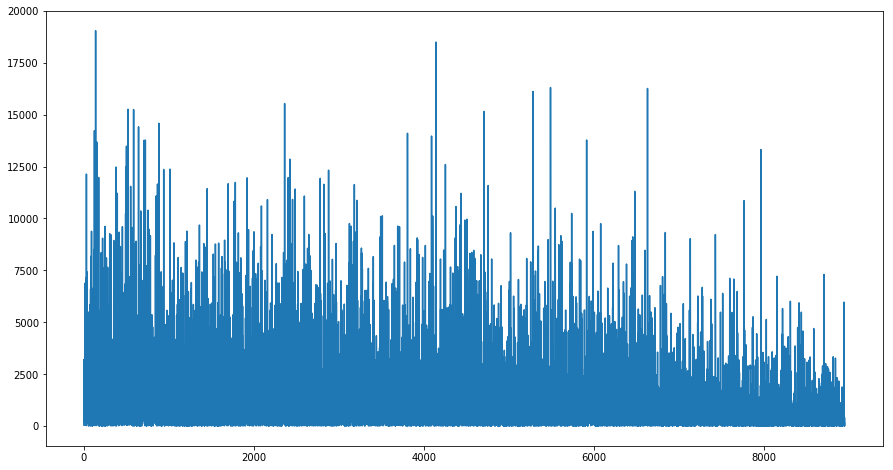

In [14]:
data['BALANCE'].plot(figsize=(15,8))

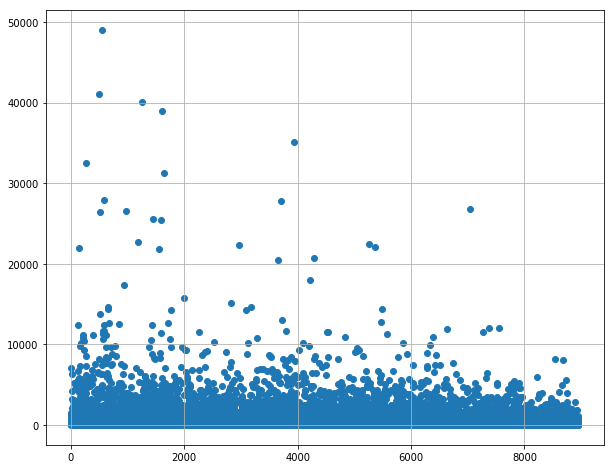

In [15]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['PURCHASES'])
plt.grid()

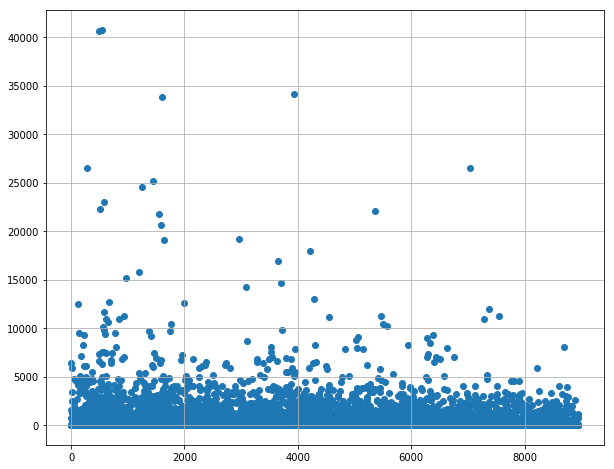

In [16]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['ONEOFF_PURCHASES'])
plt.grid()

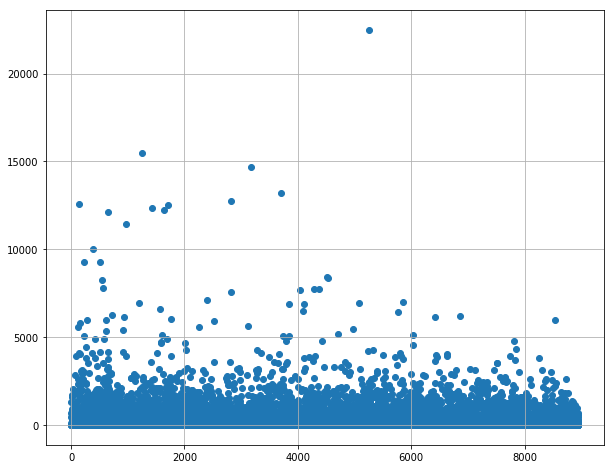

In [17]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['INSTALLMENTS_PURCHASES'])
plt.grid()

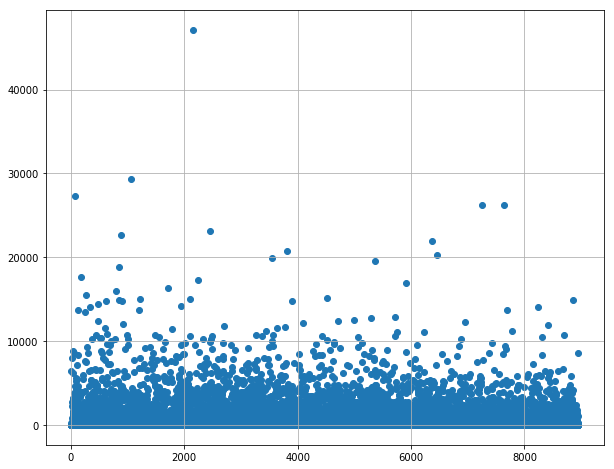

In [18]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['CASH_ADVANCE'])
plt.grid()

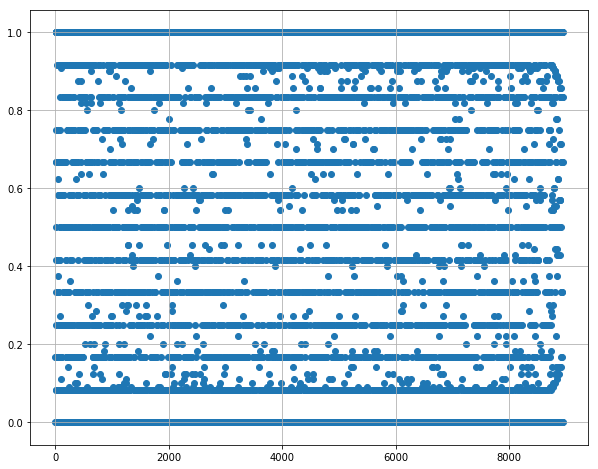

In [19]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['PURCHASES_FREQUENCY'])
plt.grid()

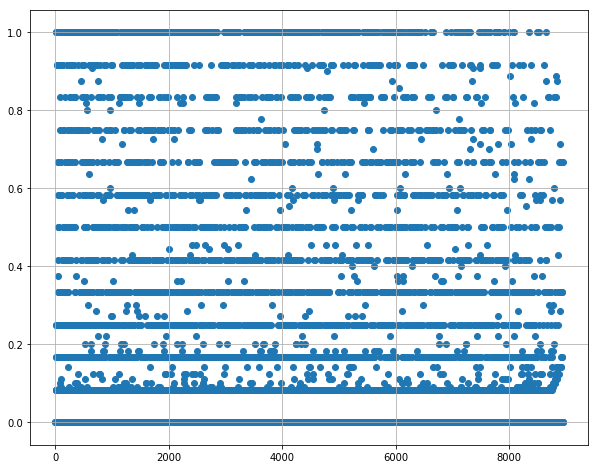

In [20]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['ONEOFF_PURCHASES_FREQUENCY'])
plt.grid()

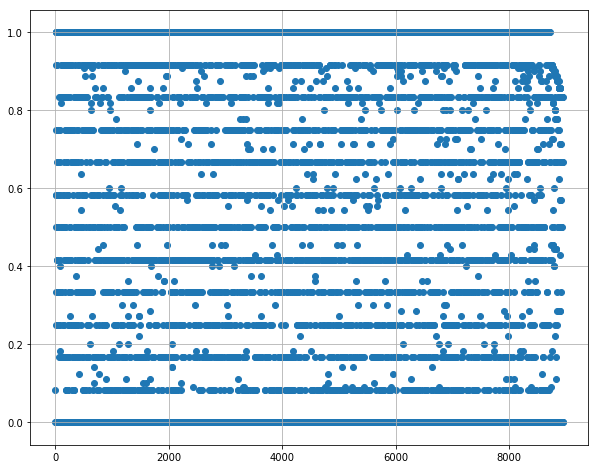

In [21]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['PURCHASES_INSTALLMENTS_FREQUENCY'])
plt.grid()

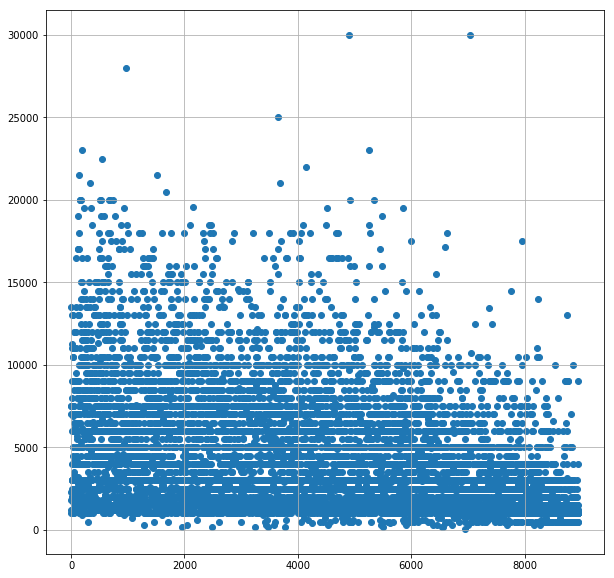

In [22]:
plt.subplots(figsize=(10,10))
plt.scatter(data.index,data['CREDIT_LIMIT'])
plt.grid()

In [23]:
print(pearsonr(data['PURCHASES'],data['INSTALLMENTS_PURCHASES']))

(0.6798885937366909, 0.0)


In [24]:
print(pearsonr(data['PURCHASES'],data['BALANCE']))

(0.18122958823397178, 6.093161599945184e-67)


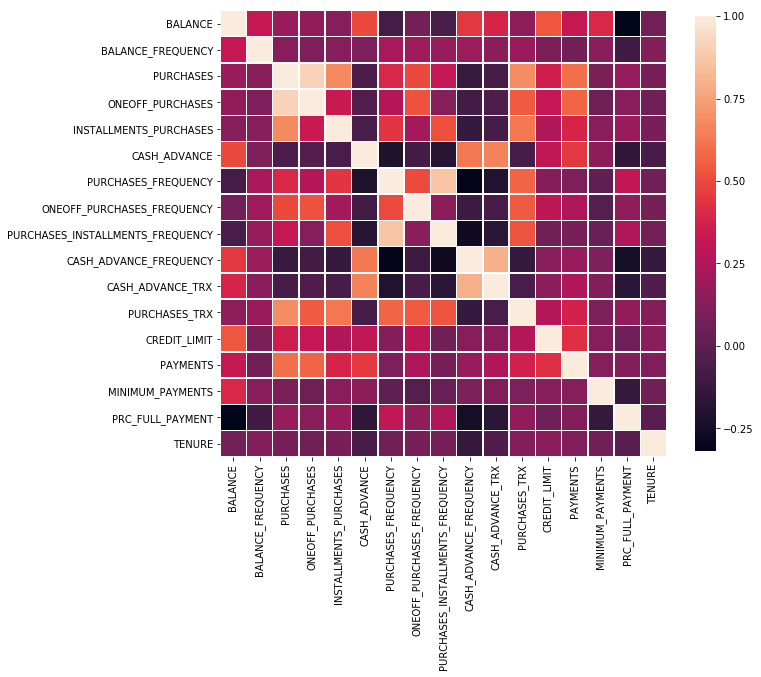

In [25]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, square=True, linewidths=.5, cbar_kws={"shrink": .8}, ax=ax)
plt.show()

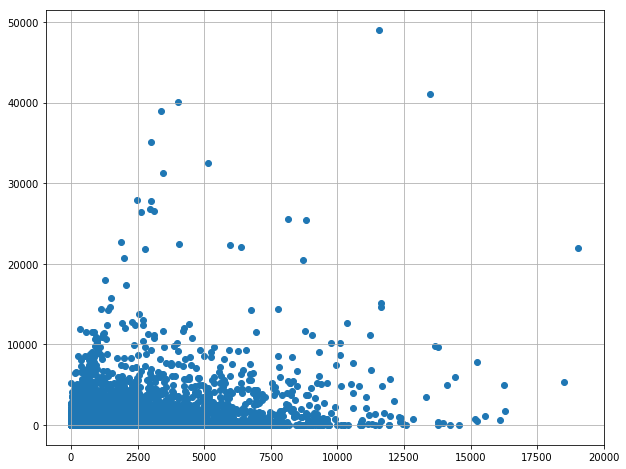

In [26]:
plt.subplots(figsize=(10,8))
plt.scatter(data['BALANCE'],data['PURCHASES'])
plt.grid()

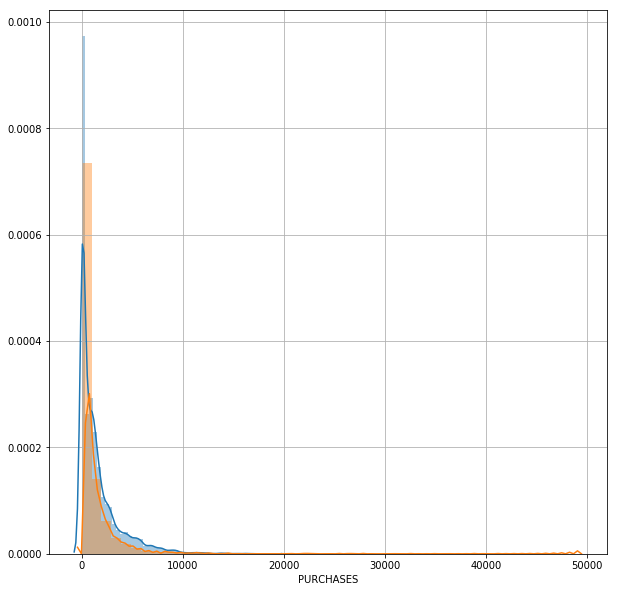

In [27]:
plt.subplots(figsize=(10,10))
sns.distplot(data['BALANCE'])
sns.distplot(data['PURCHASES'])
plt.grid()

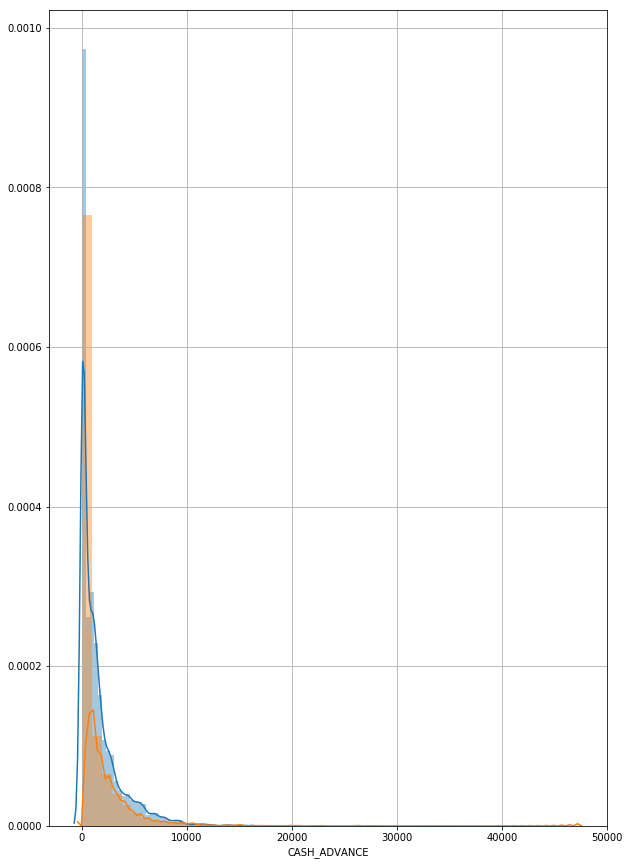

In [28]:
plt.subplots(figsize=(10,15))
sns.distplot(data['BALANCE'])
sns.distplot(data['CASH_ADVANCE'])
plt.grid()

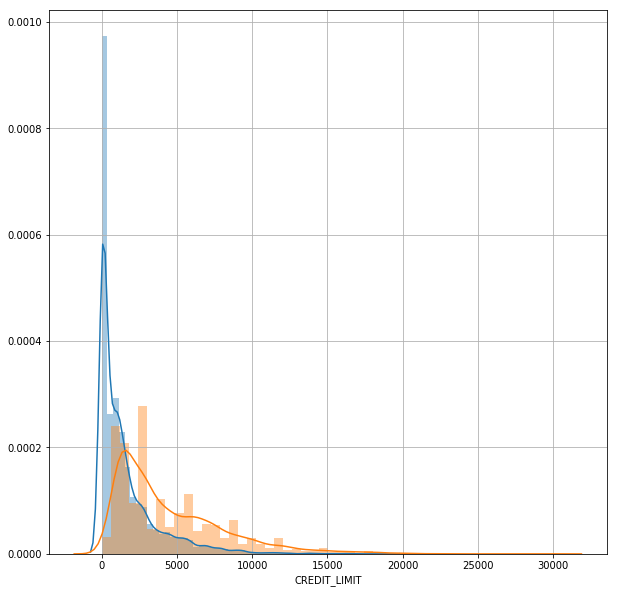

In [29]:
plt.subplots(figsize=(10,10))
sns.distplot(data['BALANCE'])
sns.distplot(data['CREDIT_LIMIT'])
plt.grid()

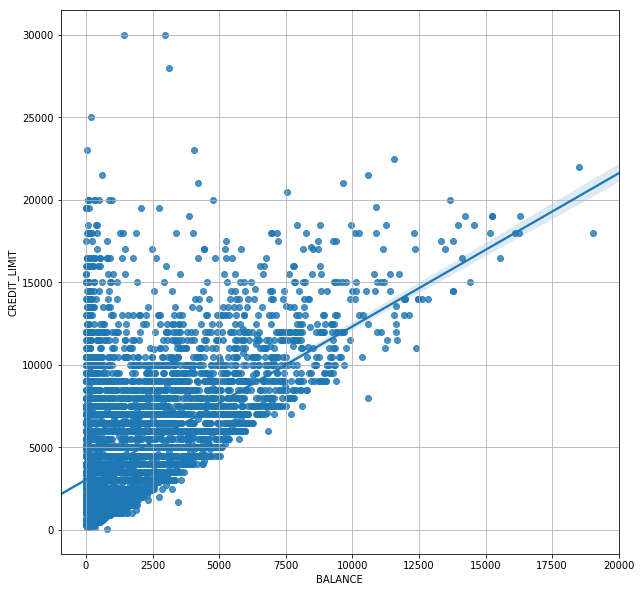

In [30]:
plt.subplots(figsize=(10,10))
sns.regplot(data['BALANCE'],data['CREDIT_LIMIT'])
plt.grid()

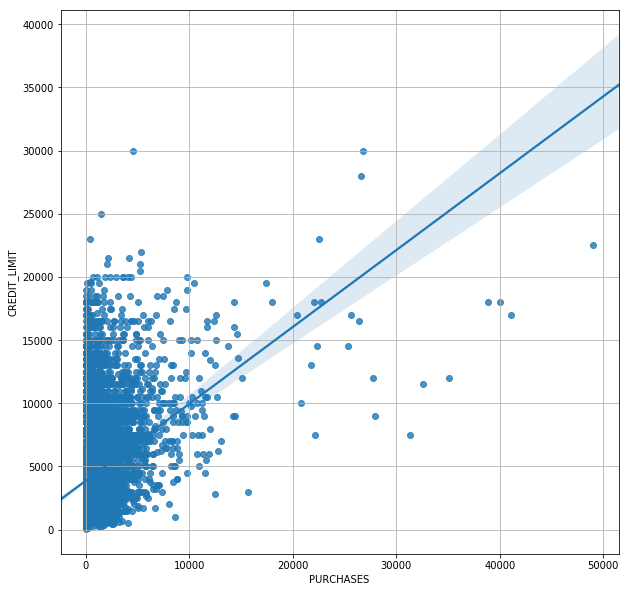

In [31]:
plt.subplots(figsize=(10,10))
sns.regplot(data['PURCHASES'],data['CREDIT_LIMIT'])
plt.grid()

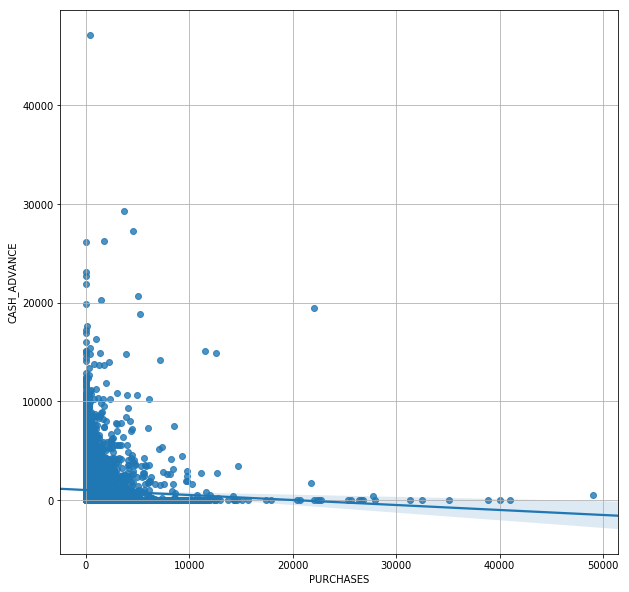

In [32]:
plt.subplots(figsize=(10,10))
sns.regplot(data['PURCHASES'],data['CASH_ADVANCE'])
plt.grid()

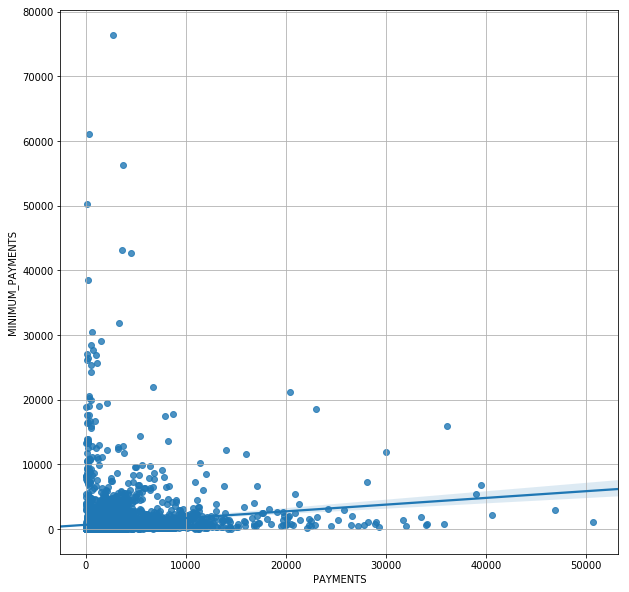

In [33]:
plt.subplots(figsize=(10,10))
sns.regplot(data['PAYMENTS'],data['MINIMUM_PAYMENTS'])
plt.grid()

In [34]:
#CLUSTER ANALYSIS

In [35]:
data.drop('CUST_ID',axis=1,inplace=True)

In [36]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

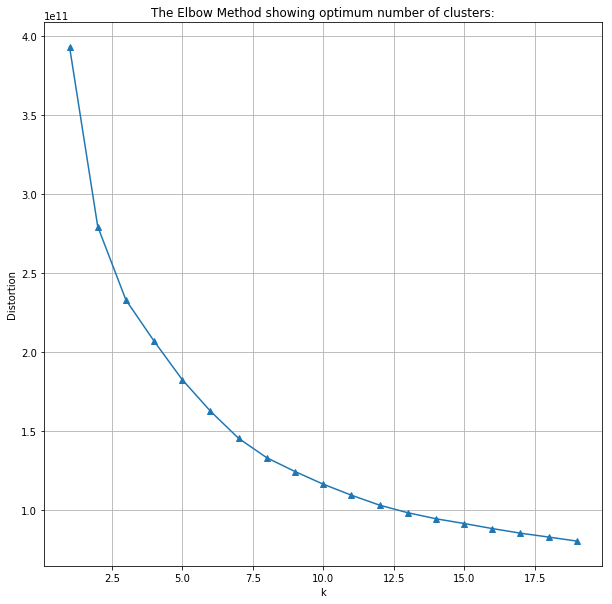

In [37]:
# Plot the elbow
plt.subplots(figsize=(10,10))
plt.plot(K, distortions, '^-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimum number of clusters:')
plt.grid()
plt.show()

Hence, number of optimum clusters will be 10

In [38]:
kmeans = KMeans(init="random", n_clusters=10)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [39]:
labels=kmeans.labels_

In [40]:
labels=labels.tolist()

In [41]:
labels=pd.Series(data=labels,index=range(len(labels)))

In [42]:
#Extracting clusters
labels_x=list()
for i in range(10):
    labels_x.append(labels[labels.values==i])

Cluster 0:

In [43]:
data.iloc[labels_x[0].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,4933.0,757.997705,775.658859,0.000000,66.723482,525.174170,1219.914858,3983.923705
BALANCE_FREQUENCY,4933.0,0.848072,0.260491,0.000000,0.818182,1.000000,1.000000,1.000000
PURCHASES,4933.0,469.604221,636.795735,0.000000,0.010000,240.250000,630.420000,4793.350000
ONEOFF_PURCHASES,4933.0,224.143142,466.880302,0.000000,0.000000,0.000000,219.800000,4768.270000
INSTALLMENTS_PURCHASES,4933.0,245.682106,407.900802,0.000000,0.000000,60.000000,343.990000,3816.000000
CASH_ADVANCE,4933.0,424.893814,726.186572,0.000000,0.000000,0.000000,589.017161,5191.738847
PURCHASES_FREQUENCY,4933.0,0.444957,0.392304,0.000000,0.083333,0.375000,0.857143,1.000000
ONEOFF_PURCHASES_FREQUENCY,4933.0,0.122684,0.220081,0.000000,0.000000,0.000000,0.166667,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,4933.0,0.343310,0.389671,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,4933.0,0.106707,0.161633,0.000000,0.000000,0.000000,0.166667,1.000000


In [44]:
cluster=data.iloc[labels_x[0].index,:]

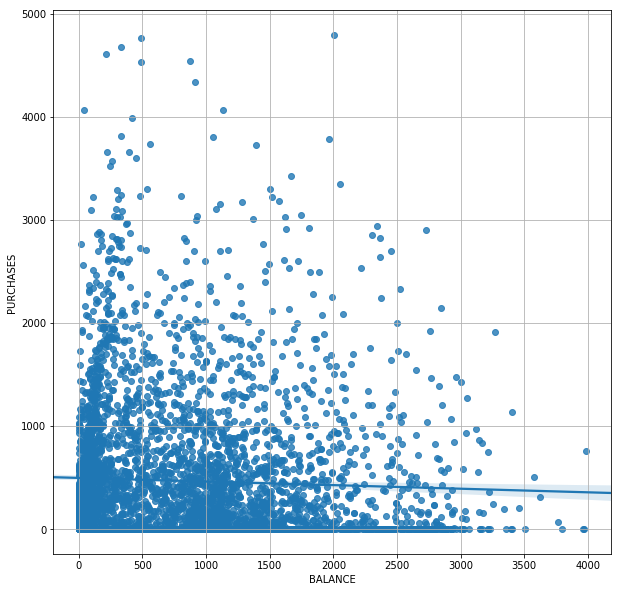

In [45]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

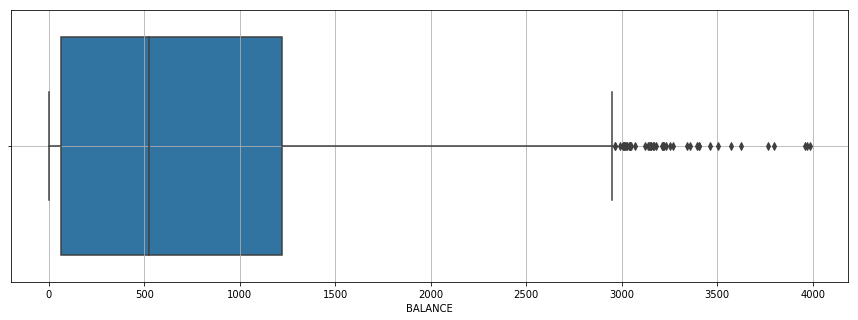

In [46]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

In [47]:
#Cluster 1:

In [48]:
data.iloc[labels_x[1].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,1657.0,847.579956,1002.564467,0.000000,86.157142,349.086448,1421.419262,4994.048320
BALANCE_FREQUENCY,1657.0,0.870886,0.241048,0.000000,0.818182,1.000000,1.000000,1.000000
PURCHASES,1657.0,1262.257121,1162.155792,0.000000,307.400000,946.000000,1976.320000,5677.760000
ONEOFF_PURCHASES,1657.0,726.451165,874.943923,0.000000,0.000000,403.100000,1103.500000,4674.210000
INSTALLMENTS_PURCHASES,1657.0,536.303018,725.613620,0.000000,0.000000,250.040000,819.880000,4538.840000
CASH_ADVANCE,1657.0,185.598800,484.882045,0.000000,0.000000,0.000000,0.000000,4034.656192
PURCHASES_FREQUENCY,1657.0,0.635161,0.365225,0.000000,0.250000,0.750000,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,1657.0,0.329110,0.344555,0.000000,0.000000,0.166667,0.583333,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,1657.0,0.448665,0.401397,0.000000,0.000000,0.416667,0.916667,1.000000
CASH_ADVANCE_FREQUENCY,1657.0,0.045817,0.111240,0.000000,0.000000,0.000000,0.000000,0.833333


In [49]:
cluster=data.iloc[labels_x[1].index,:]

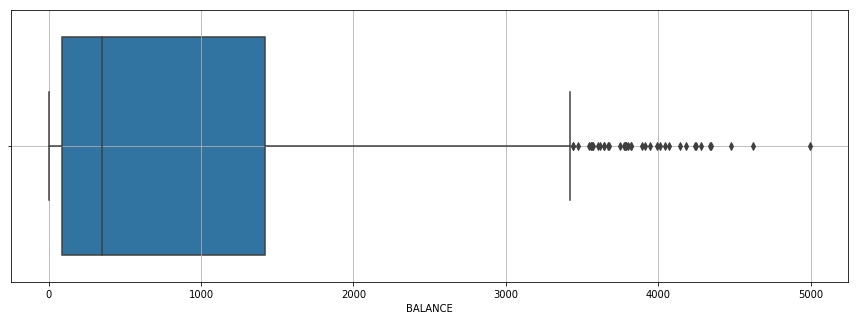

In [50]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

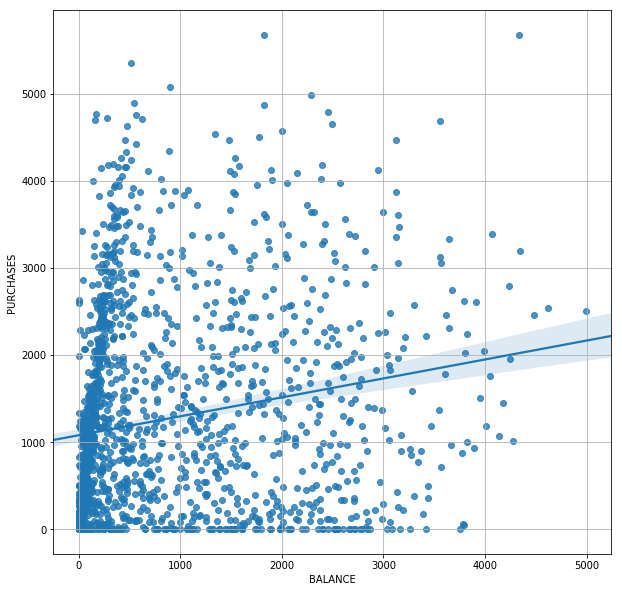

In [51]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

In [52]:
#Cluster 2:

In [53]:
data.iloc[labels_x[2].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,300.0,2464.920642,2219.429203,0.000000,742.371934,1787.788132,3458.554905,11642.601560
BALANCE_FREQUENCY,300.0,0.969182,0.101846,0.000000,1.000000,1.000000,1.000000,1.000000
PURCHASES,300.0,6837.453533,2943.954655,1200.000000,4935.427500,6006.345000,8398.872500,22500.000000
ONEOFF_PURCHASES,300.0,4651.603033,2763.810614,0.000000,2730.377500,4267.140000,6241.655000,14215.000000
INSTALLMENTS_PURCHASES,300.0,2187.850500,2651.966137,0.000000,456.052500,1530.235000,2902.162500,22500.000000
CASH_ADVANCE,300.0,559.329133,1287.604750,0.000000,0.000000,0.000000,226.361813,7974.415626
PURCHASES_FREQUENCY,300.0,0.912288,0.180959,0.083333,0.916667,1.000000,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,300.0,0.713652,0.295478,0.000000,0.583333,0.818182,1.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,300.0,0.701591,0.364325,0.000000,0.500000,0.916667,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,300.0,0.072020,0.153906,0.000000,0.000000,0.000000,0.083333,0.833333


In [54]:
cluster=data.iloc[labels_x[2].index,:]

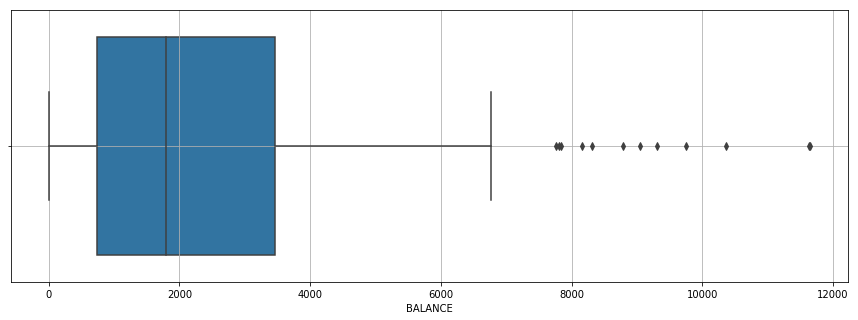

In [55]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

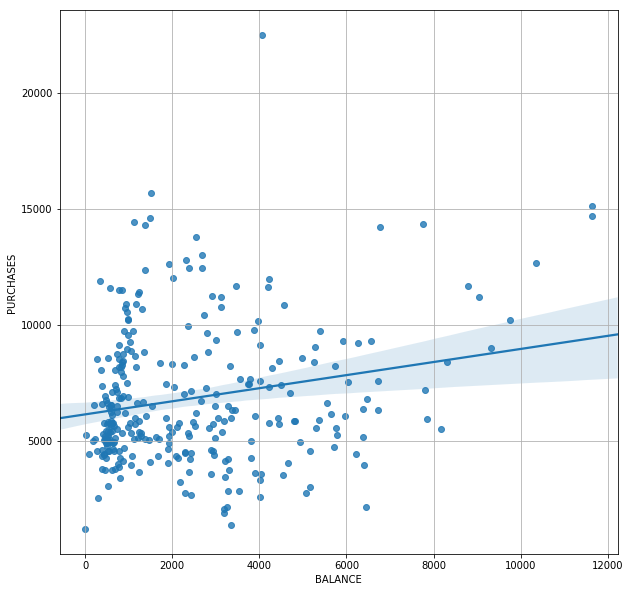

In [56]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

In [57]:
#Cluster 3:

In [58]:
data.iloc[labels_x[3].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,96.0,4942.265048,3484.412203,4.382924,1910.440437,4617.749951,7090.669456,14581.45914
BALANCE_FREQUENCY,96.0,0.859674,0.261238,0.090909,0.818182,1.000000,1.000000,1.00000
PURCHASES,96.0,1569.683646,2632.824132,0.000000,0.000000,114.195000,1983.507500,12551.95000
ONEOFF_PURCHASES,96.0,907.922396,1772.201878,0.000000,0.000000,0.000000,1041.605000,10901.24000
INSTALLMENTS_PURCHASES,96.0,661.990417,1383.291143,0.000000,0.000000,0.000000,775.587500,8409.93000
CASH_ADVANCE,96.0,11348.961969,7330.413884,0.000000,7193.043788,10544.392855,14817.878988,47137.21176
PURCHASES_FREQUENCY,96.0,0.366443,0.423829,0.000000,0.000000,0.083333,0.833333,1.00000
ONEOFF_PURCHASES_FREQUENCY,96.0,0.203001,0.313038,0.000000,0.000000,0.000000,0.333333,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,96.0,0.296311,0.398656,0.000000,0.000000,0.000000,0.643940,1.00000
CASH_ADVANCE_FREQUENCY,96.0,0.486415,0.296134,0.000000,0.250000,0.477272,0.750000,1.00000


In [59]:
cluster=data.iloc[labels_x[3].index,:]

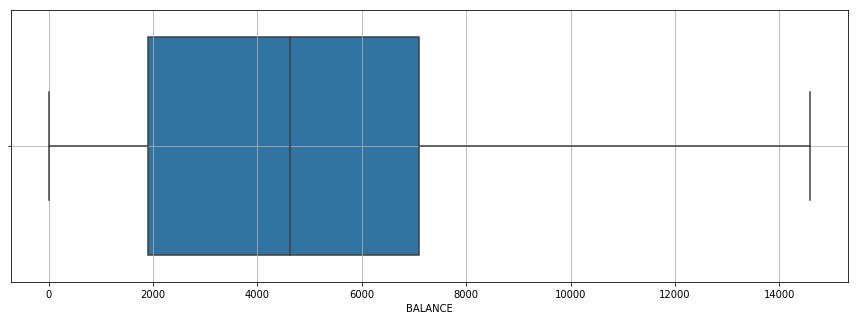

In [60]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

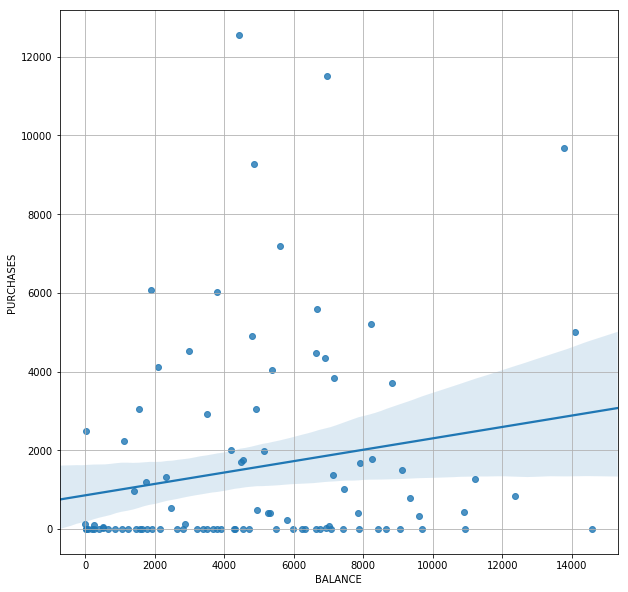

In [61]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

In [62]:
#Cluster 4:

In [63]:
data.iloc[labels_x[4].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,87.0,2749.808003,2029.669057,758.118109,1351.863754,1884.252524,3547.536274,11209.370760
BALANCE_FREQUENCY,87.0,0.981772,0.055877,0.727273,1.000000,1.000000,1.000000,1.000000
PURCHASES,87.0,858.521839,1686.074544,0.000000,0.000000,266.640000,785.410000,11147.330000
ONEOFF_PURCHASES,87.0,129.297931,439.143363,0.000000,0.000000,0.000000,43.825000,2951.930000
INSTALLMENTS_PURCHASES,87.0,729.223908,1568.164177,0.000000,0.000000,119.340000,563.030000,10009.930000
CASH_ADVANCE,87.0,787.450548,1500.373376,0.000000,0.000000,19.555003,1089.067032,10616.270140
PURCHASES_FREQUENCY,87.0,0.474967,0.420468,0.000000,0.000000,0.416667,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,87.0,0.039940,0.071502,0.000000,0.000000,0.000000,0.083333,0.333333
PURCHASES_INSTALLMENTS_FREQUENCY,87.0,0.446609,0.431768,0.000000,0.000000,0.416667,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,87.0,0.108528,0.131666,0.000000,0.000000,0.083333,0.166667,0.500000


In [64]:
cluster=data.iloc[labels_x[4].index,:]

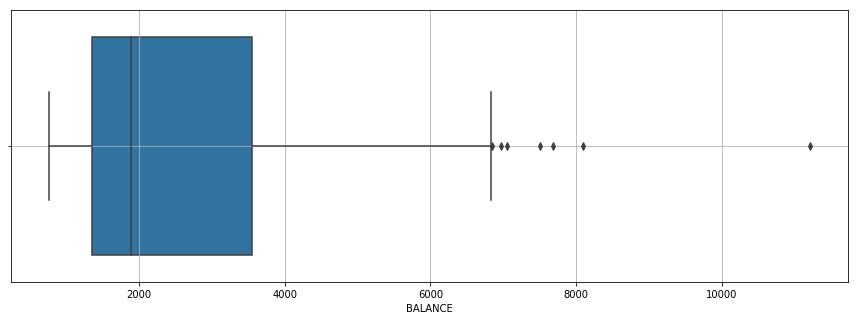

In [65]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

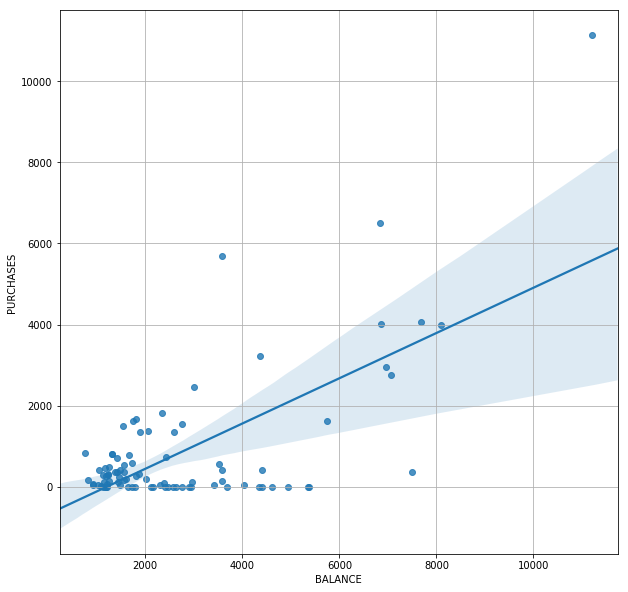

In [66]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

In [67]:
#Cluster 5:

In [68]:
data.iloc[labels_x[5].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,23.0,5448.201718,4409.774373,1268.809031,2708.796498,3391.702180,7262.084047,19043.138560
BALANCE_FREQUENCY,23.0,0.956126,0.154877,0.272727,1.000000,1.000000,1.000000,1.000000
PURCHASES,23.0,27916.555652,8172.003282,17409.210000,22055.850000,26402.390000,31919.565000,49039.570000
ONEOFF_PURCHASES,23.0,22354.314348,8514.413412,9449.070000,16329.990000,21802.600000,25818.545000,40761.250000
INSTALLMENTS_PURCHASES,23.0,5562.241304,4792.652086,0.000000,767.865000,4924.710000,8009.295000,15497.190000
CASH_ADVANCE,23.0,970.110470,4060.905703,0.000000,0.000000,0.000000,0.000000,19513.474830
PURCHASES_FREQUENCY,23.0,0.905072,0.227937,0.166667,1.000000,1.000000,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,23.0,0.850000,0.243760,0.166667,0.708333,1.000000,1.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,23.0,0.708696,0.377186,0.000000,0.500000,0.916667,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,23.0,0.039855,0.139601,0.000000,0.000000,0.000000,0.000000,0.666667


In [69]:
cluster=data.iloc[labels_x[5].index,:]

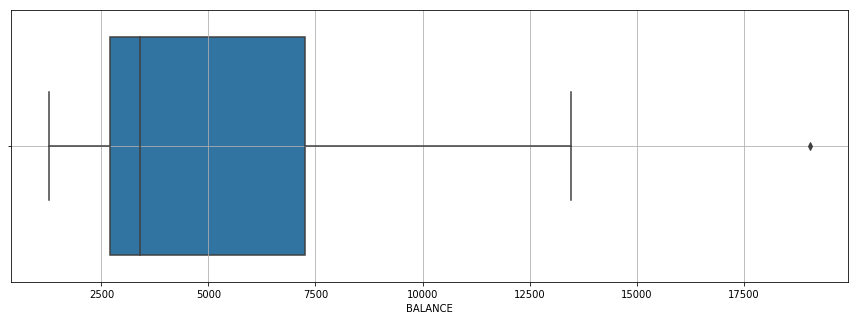

In [70]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

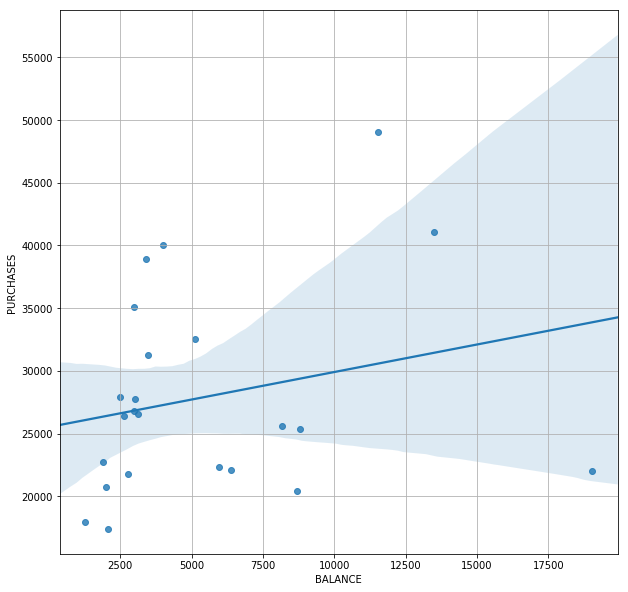

In [71]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

In [72]:
#Cluster 6:

In [73]:
data.iloc[labels_x[6].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,1040.0,3660.361721,1568.038930,8.640998,2512.278734,3676.770879,4800.753632,7659.19151
BALANCE_FREQUENCY,1040.0,0.952981,0.127346,0.181818,1.000000,1.000000,1.000000,1.00000
PURCHASES,1040.0,477.591510,768.207584,0.000000,0.000000,82.725000,648.422500,4767.11000
ONEOFF_PURCHASES,1040.0,272.757327,544.968596,0.000000,0.000000,0.000000,299.052500,4139.56000
INSTALLMENTS_PURCHASES,1040.0,204.867567,437.326783,0.000000,0.000000,0.000000,216.405000,3607.75000
CASH_ADVANCE,1040.0,3255.244079,2068.761026,0.000000,1844.262429,3008.152957,4327.142101,11220.76636
PURCHASES_FREQUENCY,1040.0,0.304597,0.369735,0.000000,0.000000,0.083333,0.583333,1.00000
ONEOFF_PURCHASES_FREQUENCY,1040.0,0.135636,0.232679,0.000000,0.000000,0.000000,0.166667,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,1040.0,0.203308,0.331338,0.000000,0.000000,0.000000,0.333333,1.00000
CASH_ADVANCE_FREQUENCY,1040.0,0.360021,0.228572,0.000000,0.166667,0.333333,0.500000,1.50000


In [74]:
cluster=data.iloc[labels_x[6].index,:]

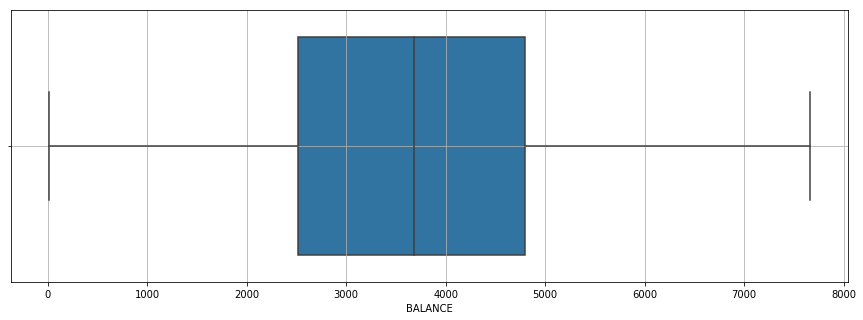

In [75]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

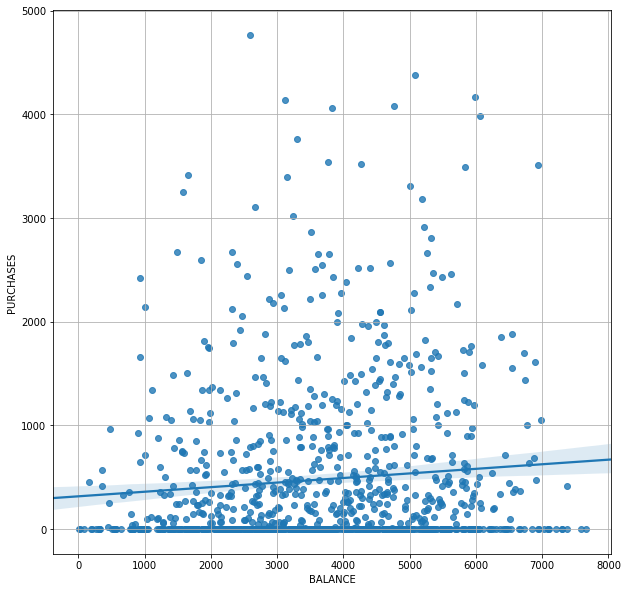

In [76]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

In [77]:
#Cluster 7:

In [78]:
data.iloc[labels_x[7].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,469.0,1559.168997,1824.932551,0.488050,131.459201,492.916599,3007.664861,6537.852206
BALANCE_FREQUENCY,469.0,0.878689,0.228991,0.090909,0.875000,1.000000,1.000000,1.000000
PURCHASES,469.0,1589.728742,1452.280139,0.000000,414.000000,1174.590000,2405.970000,6407.670000
ONEOFF_PURCHASES,469.0,999.900000,1113.226093,0.000000,67.080000,617.540000,1516.420000,6300.400000
INSTALLMENTS_PURCHASES,469.0,589.933220,773.852120,0.000000,0.000000,278.700000,921.470000,4116.000000
CASH_ADVANCE,469.0,400.942979,965.206971,0.000000,0.000000,0.000000,98.596565,6523.780195
PURCHASES_FREQUENCY,469.0,0.656646,0.369518,0.000000,0.333333,0.833333,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,469.0,0.410544,0.370443,0.000000,0.083333,0.333333,0.750000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,469.0,0.438292,0.393582,0.000000,0.000000,0.416667,0.833333,1.000000
CASH_ADVANCE_FREQUENCY,469.0,0.062366,0.137184,0.000000,0.000000,0.000000,0.083333,0.833333


In [79]:
cluster=data.iloc[labels_x[7].index,:]

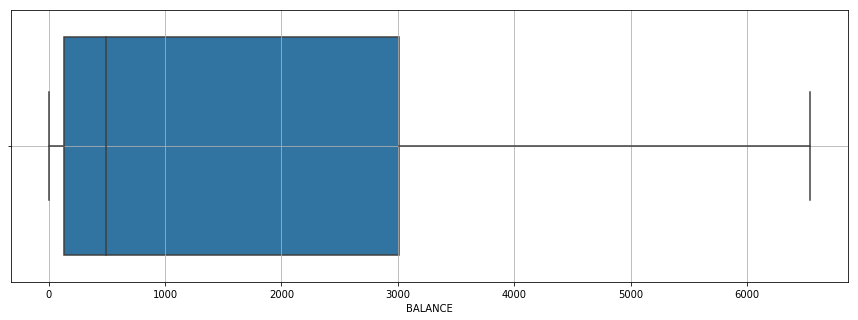

In [80]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

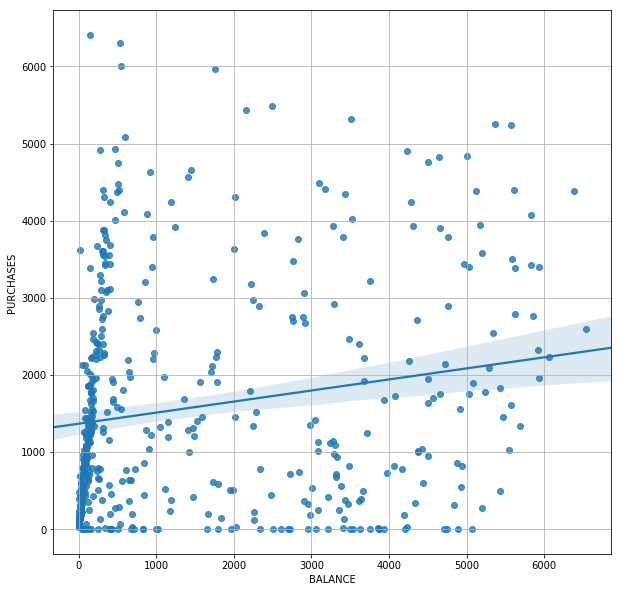

In [81]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

In [82]:
#Cluster 8:

In [83]:
data.iloc[labels_x[8].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,326.0,8107.707904,2392.777273,3520.616355,6644.890936,7690.394098,9196.612863,18495.558550
BALANCE_FREQUENCY,326.0,0.990540,0.047817,0.545455,1.000000,1.000000,1.000000,1.000000
PURCHASES,326.0,1197.268497,1850.315700,0.000000,0.000000,326.935000,1518.825000,10166.690000
ONEOFF_PURCHASES,326.0,708.193650,1208.370428,0.000000,0.000000,87.225000,973.807500,7564.810000
INSTALLMENTS_PURCHASES,326.0,489.280215,938.648709,0.000000,0.000000,0.000000,585.522500,6866.690000
CASH_ADVANCE,326.0,4352.668253,3083.393437,0.000000,2113.099288,3987.363793,6146.953693,14827.307160
PURCHASES_FREQUENCY,326.0,0.418910,0.408479,0.000000,0.000000,0.316666,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,326.0,0.216495,0.300819,0.000000,0.000000,0.083333,0.333333,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,326.0,0.322641,0.396187,0.000000,0.000000,0.000000,0.729167,1.000000
CASH_ADVANCE_FREQUENCY,326.0,0.378802,0.268485,0.000000,0.166667,0.333333,0.583333,1.125000


In [84]:
cluster=data.iloc[labels_x[8].index,:]

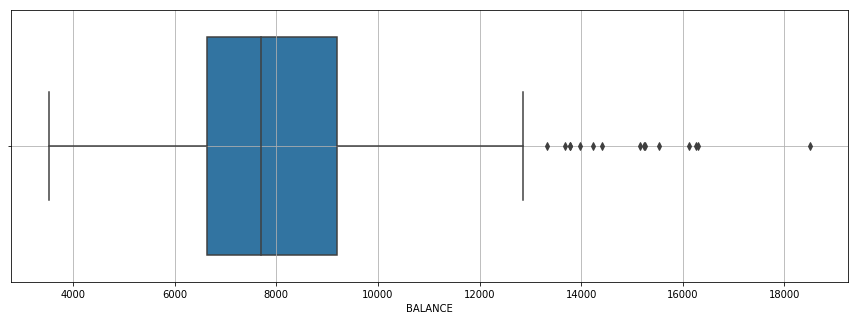

In [85]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

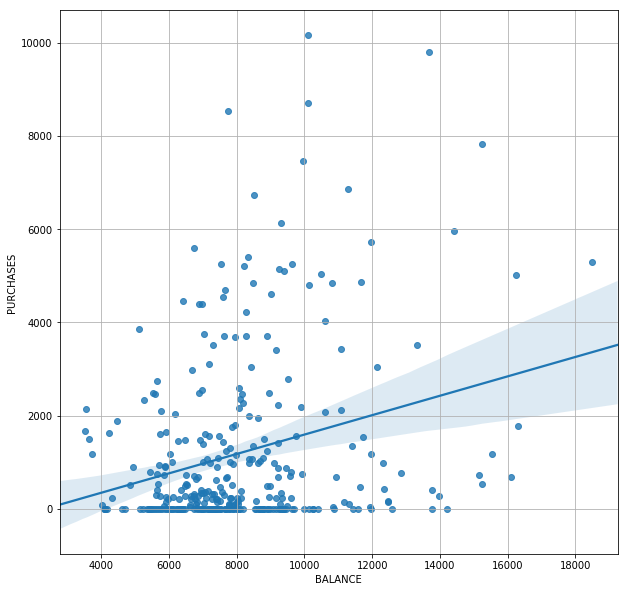

In [86]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

In [87]:
#Cluster 9:

In [88]:
data.iloc[labels_x[9].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,18.0,5487.435605,2260.775292,2748.868773,3528.041571,5010.103791,6760.186915,10571.411070
BALANCE_FREQUENCY,18.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
PURCHASES,18.0,1071.124444,1870.023856,0.000000,0.000000,473.975000,953.085000,7739.480000
ONEOFF_PURCHASES,18.0,75.295000,203.887248,0.000000,0.000000,0.000000,15.000000,669.000000
INSTALLMENTS_PURCHASES,18.0,995.829444,1859.371967,0.000000,0.000000,174.725000,953.085000,7739.480000
CASH_ADVANCE,18.0,921.412910,1633.071353,0.000000,0.000000,0.000000,673.215443,4909.937494
PURCHASES_FREQUENCY,18.0,0.493687,0.474675,0.000000,0.000000,0.484849,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,18.0,0.037037,0.081960,0.000000,0.000000,0.000000,0.062500,0.333333
PURCHASES_INSTALLMENTS_FREQUENCY,18.0,0.470539,0.491940,0.000000,0.000000,0.318182,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,18.0,0.069444,0.100041,0.000000,0.000000,0.000000,0.083333,0.333333


In [89]:
cluster=data.iloc[labels_x[9].index,:]

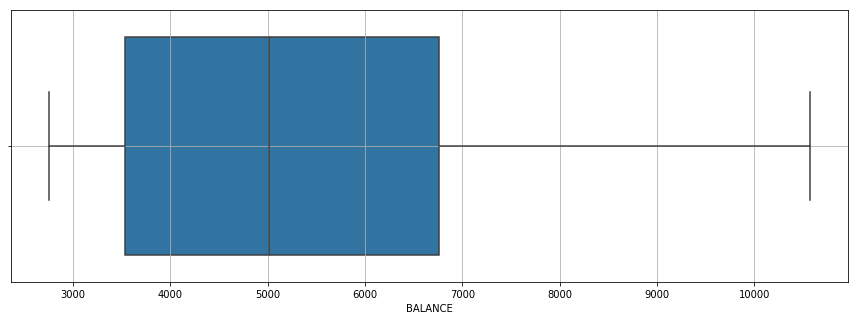

In [90]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

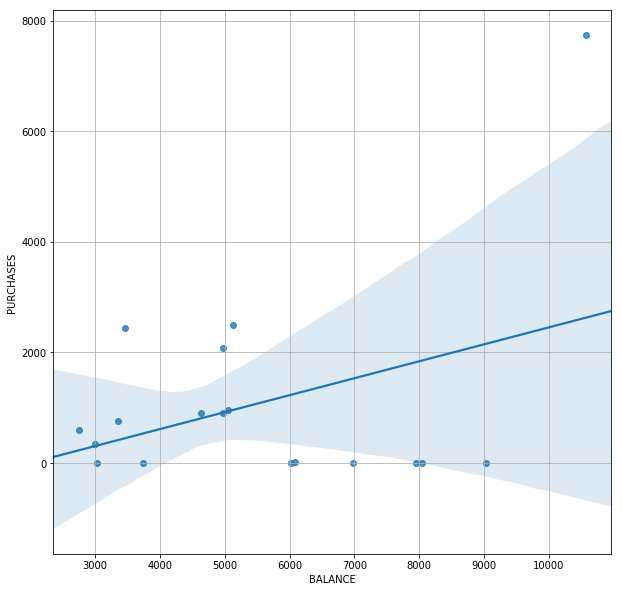

In [91]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

In [92]:
#Outlier Treatment

In [93]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
x=q3-q1
lower=q1-(1.5*x)
upper=q3+(1.5*x)

In [94]:
num=list()
for i in data.columns:
    if i in lower.index:
        num.append(i)

In [95]:
data=data[num]

In [96]:
data=data[~((data < (q1 - 1.5 * x))|(data > (q3 + 1.5 * x))).any(axis=1)]

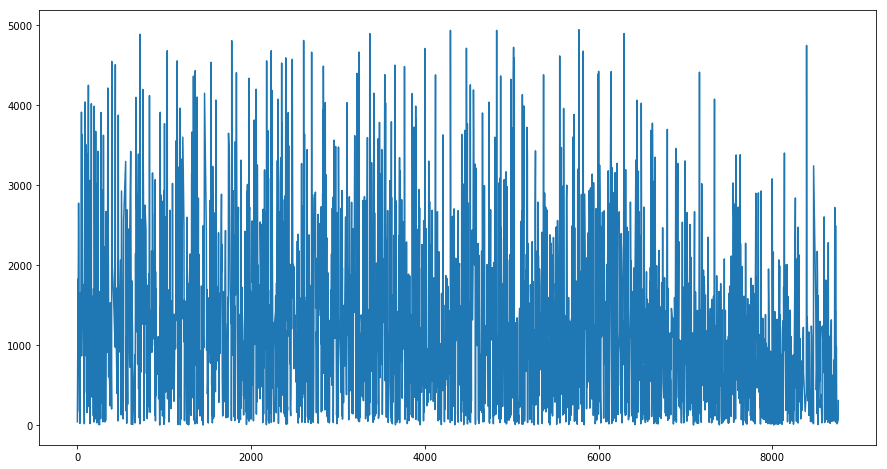

In [97]:
data['BALANCE'].plot(figsize=(15,8))

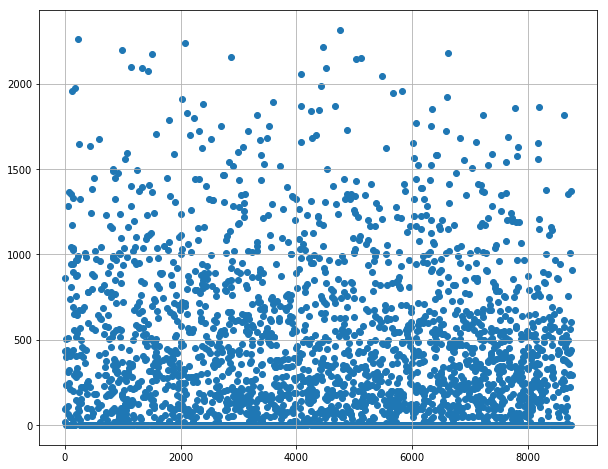

In [98]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['PURCHASES'])
plt.grid()

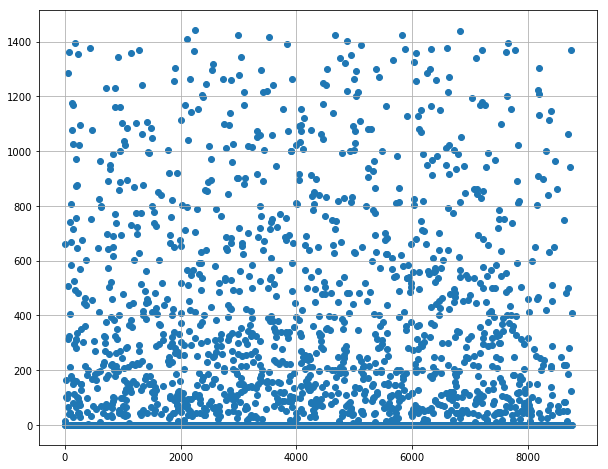

In [99]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['ONEOFF_PURCHASES'])
plt.grid()

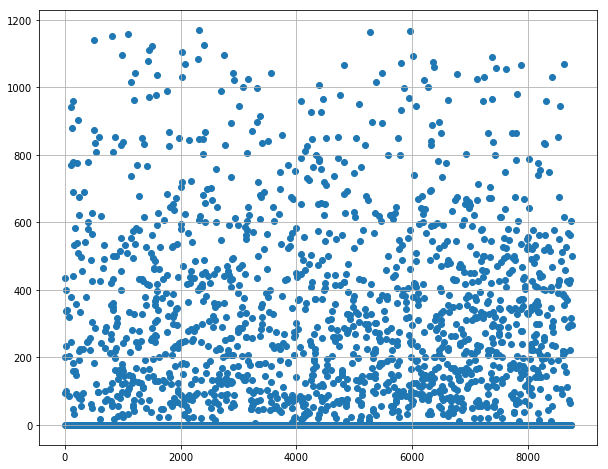

In [100]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['INSTALLMENTS_PURCHASES'])
plt.grid()

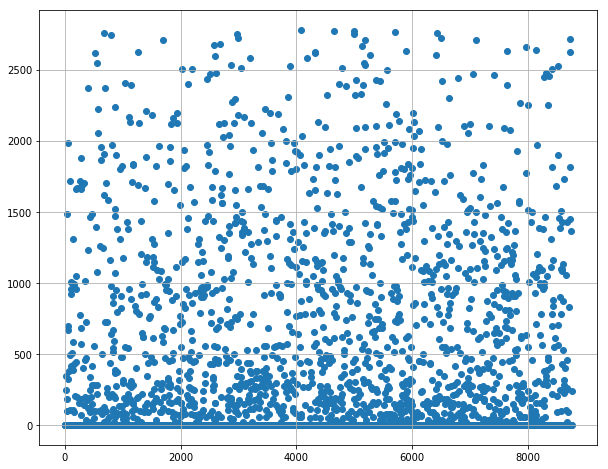

In [101]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['CASH_ADVANCE'])
plt.grid()

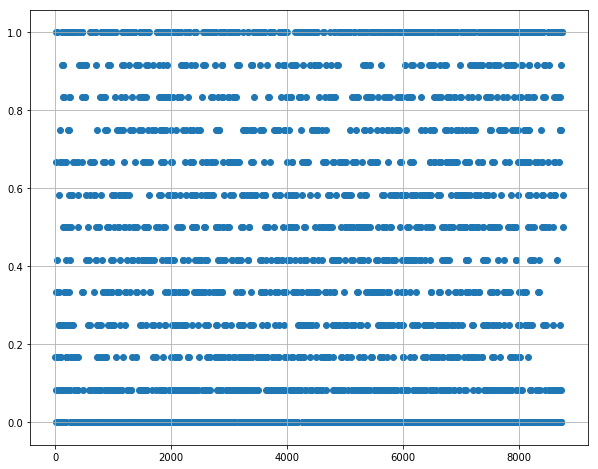

In [102]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['PURCHASES_FREQUENCY'])
plt.grid()

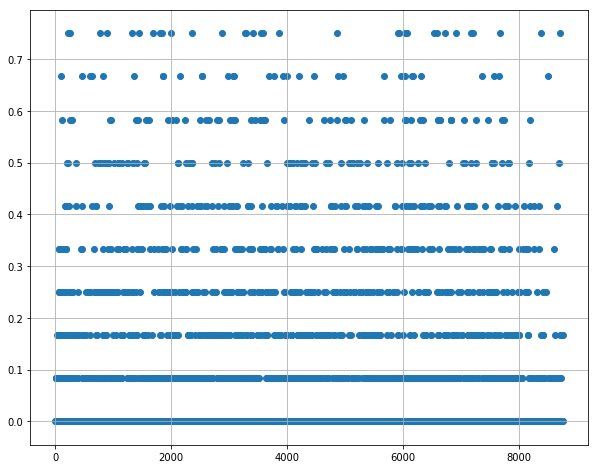

In [103]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['ONEOFF_PURCHASES_FREQUENCY'])
plt.grid()

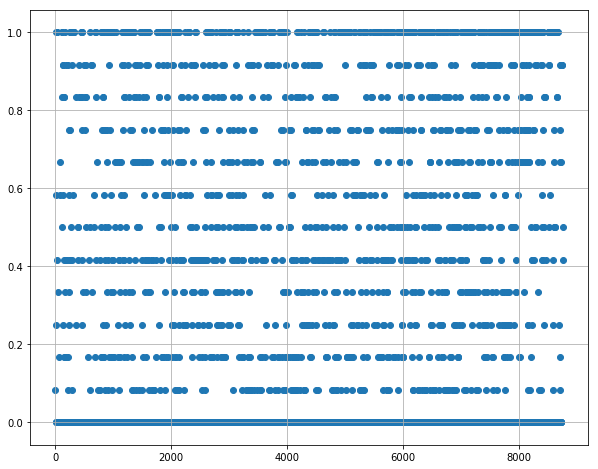

In [104]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['PURCHASES_INSTALLMENTS_FREQUENCY'])
plt.grid()

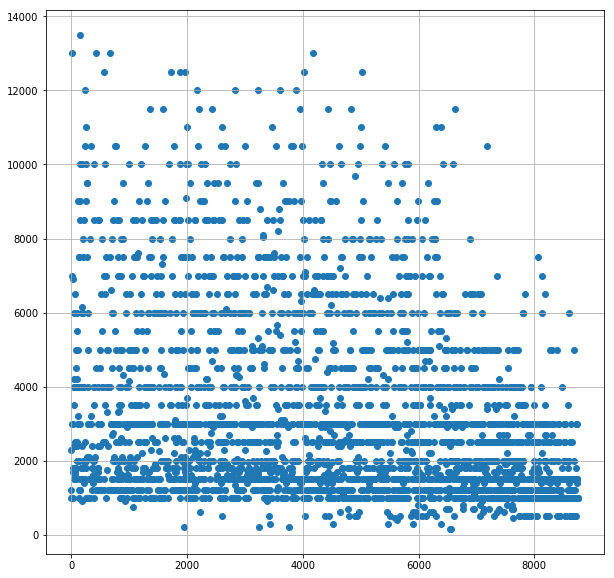

In [105]:
plt.subplots(figsize=(10,10))
plt.scatter(data.index,data['CREDIT_LIMIT'])
plt.grid()

In [106]:
print(pearsonr(data['PURCHASES'],data['INSTALLMENTS_PURCHASES']))

(0.6688900665933358, 0.0)


In [107]:
print(pearsonr(data['PURCHASES'],data['BALANCE']))

(-0.033514330319000925, 0.06708340452056054)


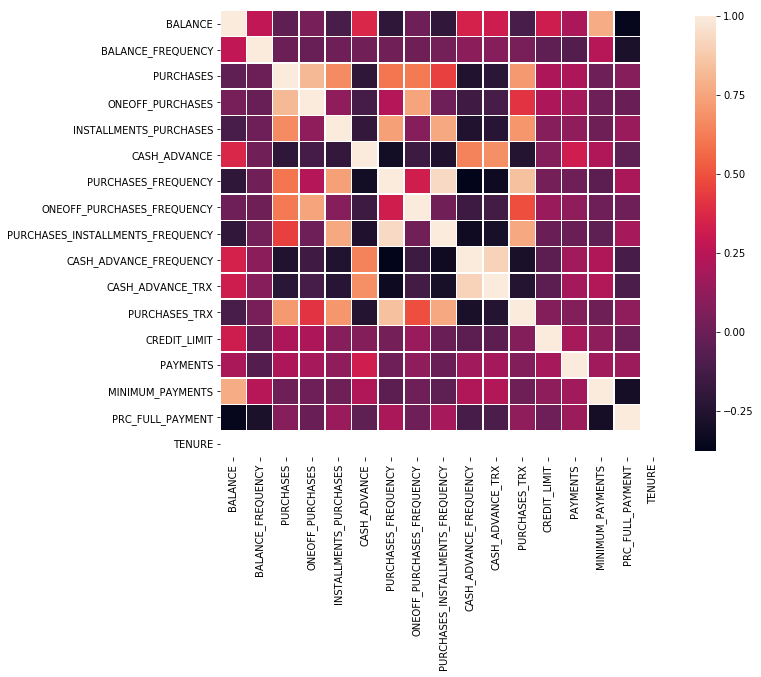

In [108]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, square=True, linewidths=.5, cbar_kws={"shrink": .8}, ax=ax)
plt.show()

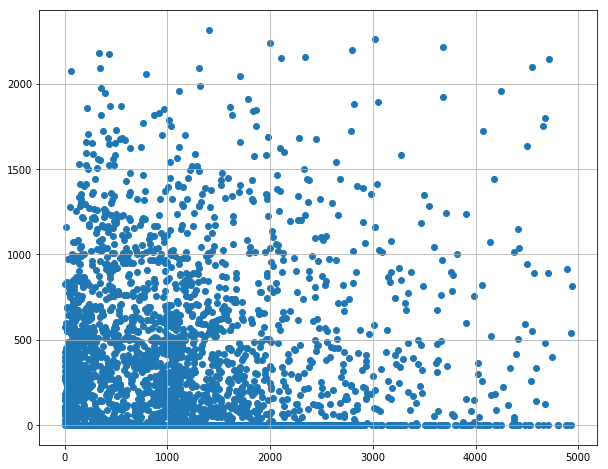

In [109]:
plt.subplots(figsize=(10,8))
plt.scatter(data['BALANCE'],data['PURCHASES'])
plt.grid()

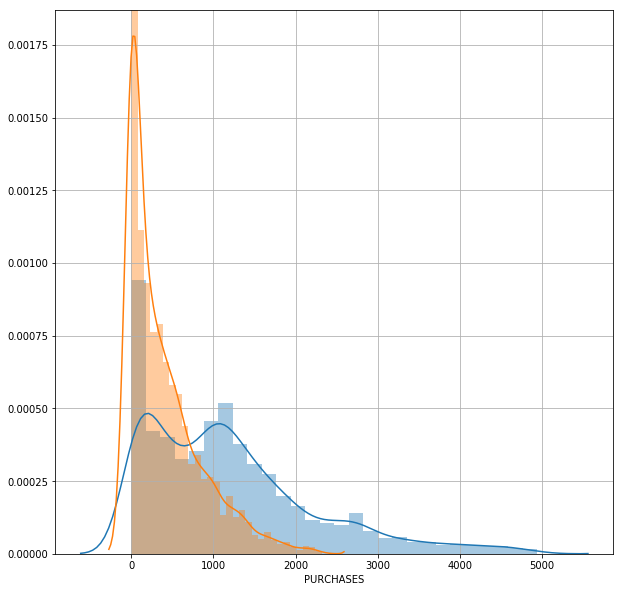

In [110]:
plt.subplots(figsize=(10,10))
sns.distplot(data['BALANCE'])
sns.distplot(data['PURCHASES'])
plt.grid()

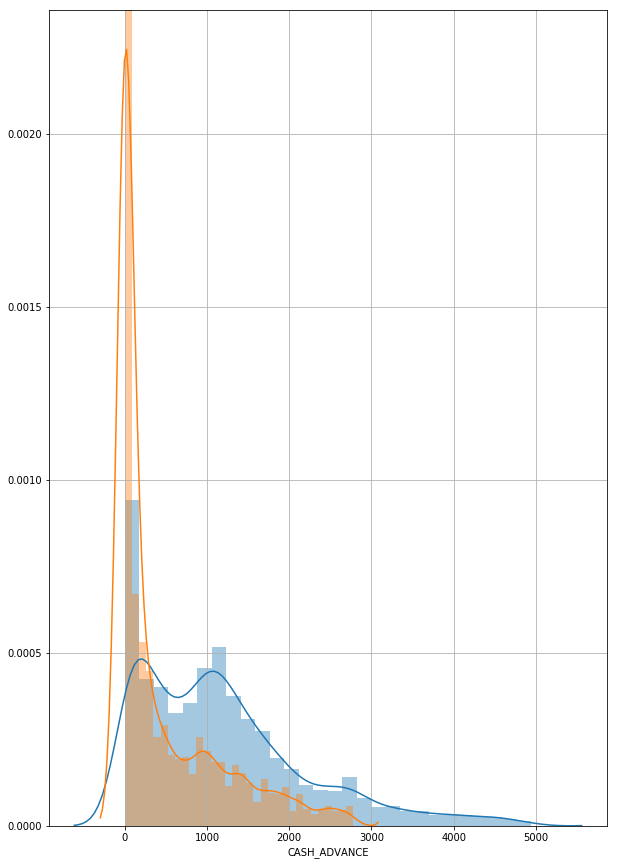

In [111]:
plt.subplots(figsize=(10,15))
sns.distplot(data['BALANCE'])
sns.distplot(data['CASH_ADVANCE'])
plt.grid()

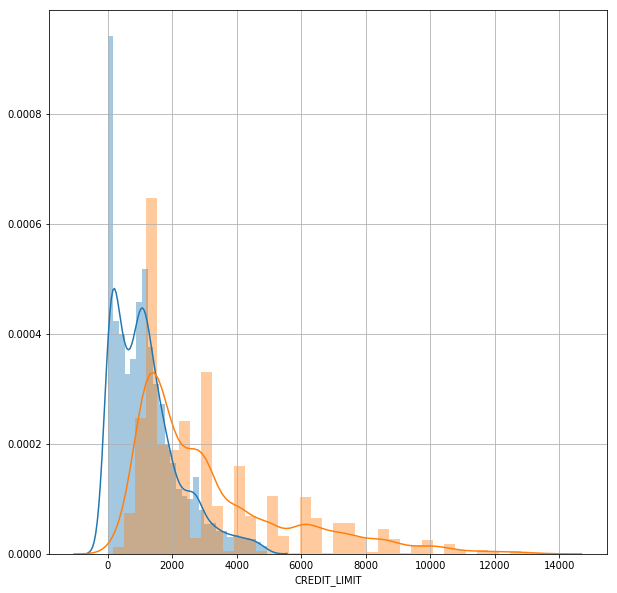

In [112]:
plt.subplots(figsize=(10,10))
sns.distplot(data['BALANCE'])
sns.distplot(data['CREDIT_LIMIT'])
plt.grid()

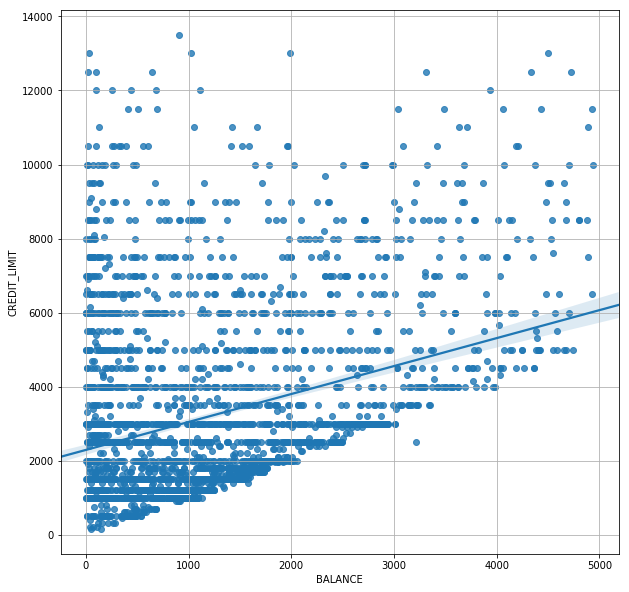

In [113]:
plt.subplots(figsize=(10,10))
sns.regplot(data['BALANCE'],data['CREDIT_LIMIT'])
plt.grid()

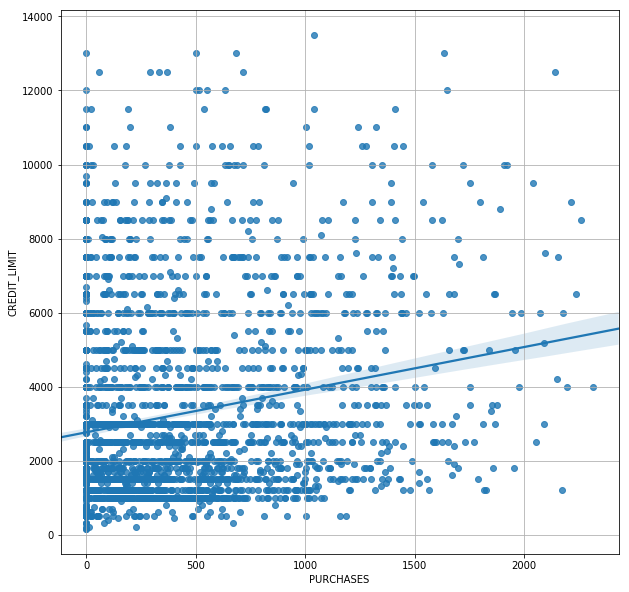

In [114]:
plt.subplots(figsize=(10,10))
sns.regplot(data['PURCHASES'],data['CREDIT_LIMIT'])
plt.grid()

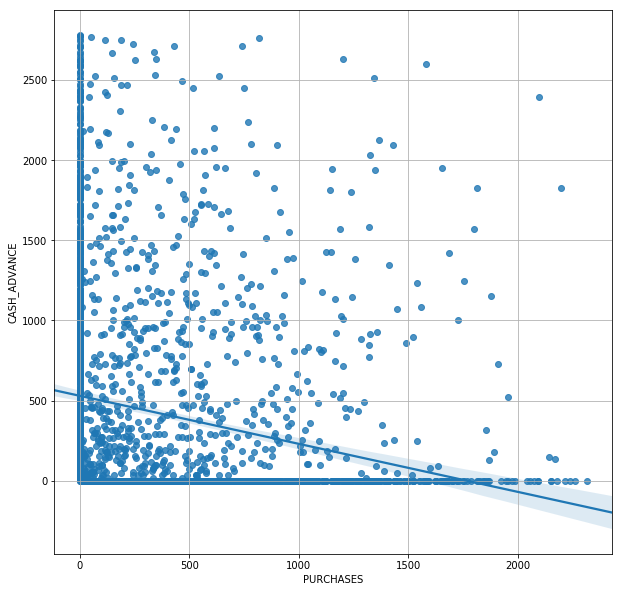

In [115]:
plt.subplots(figsize=(10,10))
sns.regplot(data['PURCHASES'],data['CASH_ADVANCE'])
plt.grid()

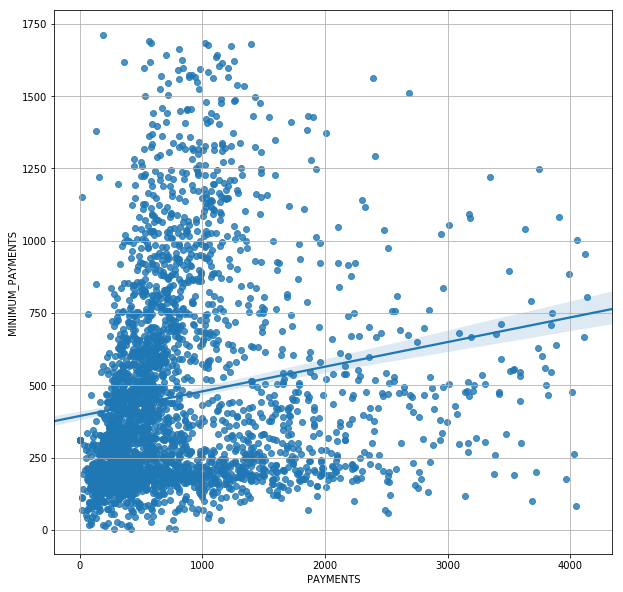

In [116]:
plt.subplots(figsize=(10,10))
sns.regplot(data['PAYMENTS'],data['MINIMUM_PAYMENTS'])
plt.grid()

In [117]:
#CLUSTER ANALYSIS

In [118]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

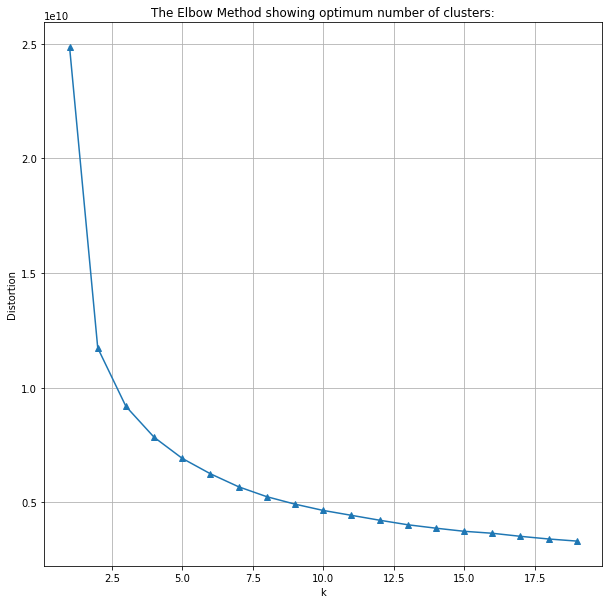

In [119]:
# Plot the elbow
plt.subplots(figsize=(10,10))
plt.plot(K, distortions, '^-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimum number of clusters:')
plt.grid()
plt.show()

In [120]:
#Hence, number of optimum clusters will be 10

In [121]:
kmeans = KMeans(init="random", n_clusters=10)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [122]:
labels=kmeans.labels_

In [123]:
labels=labels.tolist()

In [124]:
labels=pd.Series(data=labels,index=range(len(labels)))

In [125]:
#Extracting clusters
labels_x=list()
for i in range(10):
    labels_x.append(labels[labels.values==i])

In [126]:
#Cluster 0:

In [127]:
data.iloc[labels_x[0].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,125.0,3243.899206,866.294016,1777.440238,2469.665655,3160.087236,3871.433675,4940.113918
BALANCE_FREQUENCY,125.0,0.997818,0.018123,0.818182,1.000000,1.000000,1.000000,1.000000
PURCHASES,125.0,540.476000,613.221822,0.000000,0.000000,307.120000,915.810000,2260.410000
ONEOFF_PURCHASES,125.0,334.424480,433.736792,0.000000,0.000000,114.000000,551.170000,1376.540000
INSTALLMENTS_PURCHASES,125.0,206.051520,322.227997,0.000000,0.000000,0.000000,355.800000,1170.490000
CASH_ADVANCE,125.0,637.915250,765.026888,0.000000,0.000000,285.193204,1101.246941,2747.982493
PURCHASES_FREQUENCY,125.0,0.360667,0.351771,0.000000,0.000000,0.250000,0.583333,1.000000
ONEOFF_PURCHASES_FREQUENCY,125.0,0.150667,0.190411,0.000000,0.000000,0.083333,0.250000,0.750000
PURCHASES_INSTALLMENTS_FREQUENCY,125.0,0.261333,0.345436,0.000000,0.000000,0.000000,0.416667,1.000000
CASH_ADVANCE_FREQUENCY,125.0,0.124667,0.140653,0.000000,0.000000,0.083333,0.250000,0.500000


In [128]:
cluster=data.iloc[labels_x[0].index,:]

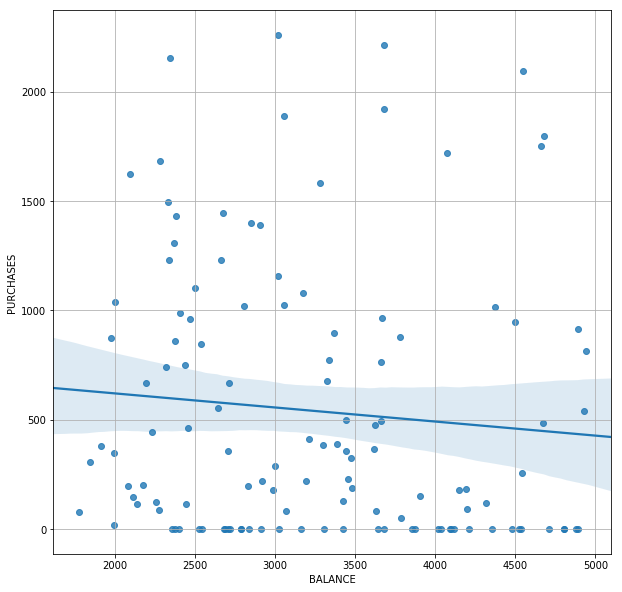

In [129]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

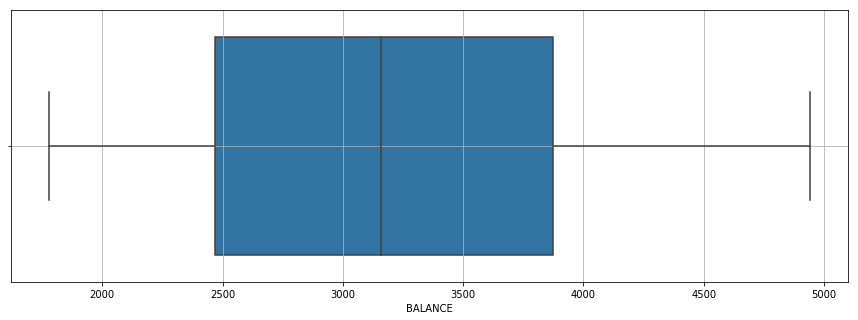

In [130]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

In [131]:
#Cluster 1:

In [132]:
data.iloc[labels_x[1].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,363.0,427.448497,392.867435,2.117128,84.732398,295.680572,735.914194,1532.106106
BALANCE_FREQUENCY,363.0,0.965690,0.077531,0.727273,1.000000,1.000000,1.000000,1.000000
PURCHASES,363.0,501.606226,450.320411,0.000000,133.420000,380.100000,757.615000,2091.440000
ONEOFF_PURCHASES,363.0,259.443003,371.396971,0.000000,0.000000,45.650000,444.850000,1440.140000
INSTALLMENTS_PURCHASES,363.0,242.163223,275.597091,0.000000,0.000000,139.900000,399.800000,1166.680000
CASH_ADVANCE,363.0,141.107751,336.041574,0.000000,0.000000,0.000000,0.000000,1820.800715
PURCHASES_FREQUENCY,363.0,0.532140,0.365138,0.000000,0.166667,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,363.0,0.128788,0.171209,0.000000,0.000000,0.083333,0.250000,0.750000
PURCHASES_INSTALLMENTS_FREQUENCY,363.0,0.430670,0.403635,0.000000,0.000000,0.416667,0.833333,1.000000
CASH_ADVANCE_FREQUENCY,363.0,0.037649,0.081695,0.000000,0.000000,0.000000,0.000000,0.500000


In [133]:
cluster=data.iloc[labels_x[1].index,:]

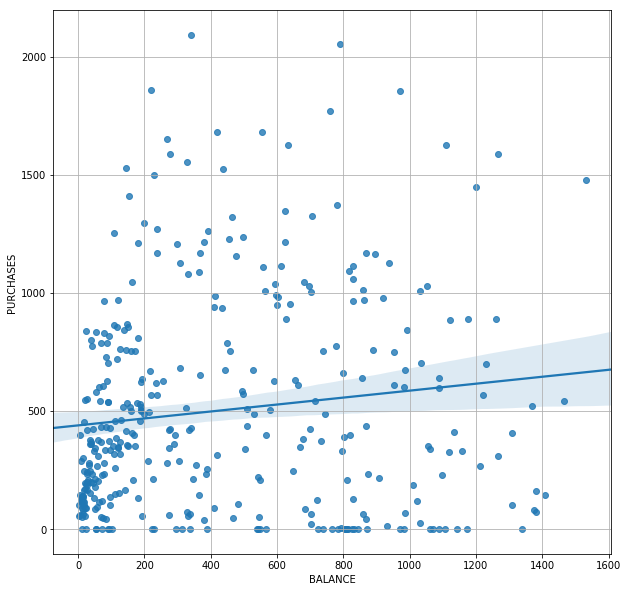

In [134]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

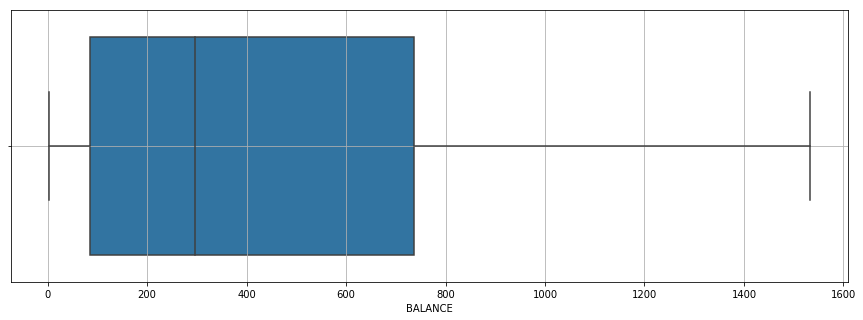

In [135]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

In [136]:
#Cluster 2:

In [137]:
data.iloc[labels_x[2].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,335.0,2201.365436,536.487499,803.033404,1818.531354,2242.311686,2648.270778,3347.229846
BALANCE_FREQUENCY,335.0,0.994573,0.033297,0.727273,1.000000,1.000000,1.000000,1.000000
PURCHASES,335.0,256.487284,397.194480,0.000000,0.000000,37.920000,395.260000,1847.570000
ONEOFF_PURCHASES,335.0,143.946836,300.837207,0.000000,0.000000,0.000000,126.390000,1425.130000
INSTALLMENTS_PURCHASES,335.0,112.706269,227.222254,0.000000,0.000000,0.000000,111.605000,1066.560000
CASH_ADVANCE,335.0,868.190103,781.889053,0.000000,182.969338,657.525213,1436.049370,2774.385866
PURCHASES_FREQUENCY,335.0,0.250000,0.339023,0.000000,0.000000,0.083333,0.458334,1.000000
ONEOFF_PURCHASES_FREQUENCY,335.0,0.086816,0.165378,0.000000,0.000000,0.000000,0.083333,0.750000
PURCHASES_INSTALLMENTS_FREQUENCY,335.0,0.178607,0.313372,0.000000,0.000000,0.000000,0.250000,1.000000
CASH_ADVANCE_FREQUENCY,335.0,0.171891,0.127974,0.000000,0.083333,0.166667,0.250000,0.500000


In [138]:
cluster=data.iloc[labels_x[2].index,:]

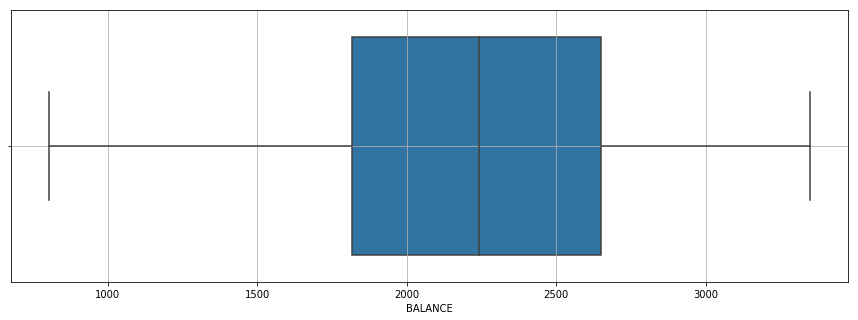

In [139]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

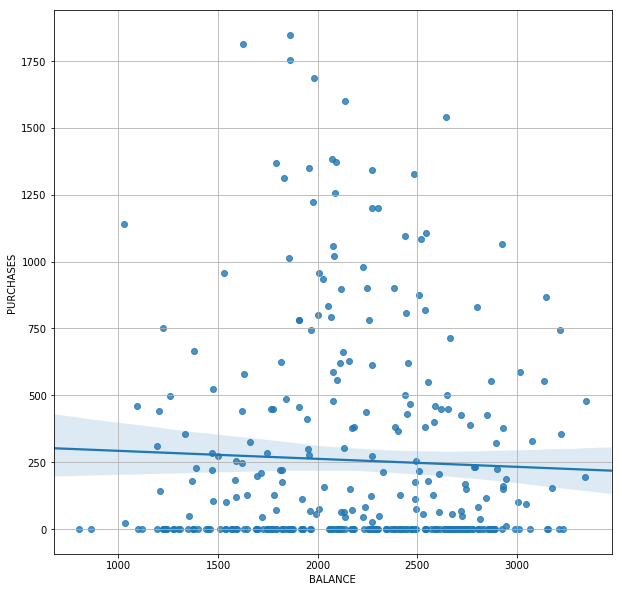

In [140]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

In [141]:
#Cluster 3:

In [142]:
data.iloc[labels_x[3].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,520.0,373.160876,283.019356,3.574463,114.489844,348.806379,582.259243,983.363407
BALANCE_FREQUENCY,520.0,0.968881,0.073480,0.727273,1.000000,1.000000,1.000000,1.000000
PURCHASES,520.0,325.916212,344.054932,0.000000,45.650000,230.020000,505.732500,2171.860000
ONEOFF_PURCHASES,520.0,140.573885,268.940527,0.000000,0.000000,0.000000,160.485000,1408.820000
INSTALLMENTS_PURCHASES,520.0,185.342327,225.632184,0.000000,0.000000,108.395000,300.020000,1125.760000
CASH_ADVANCE,520.0,166.216745,318.362166,0.000000,0.000000,0.000000,156.257384,1903.840296
PURCHASES_FREQUENCY,520.0,0.477083,0.383257,0.000000,0.083333,0.458334,0.833333,1.000000
ONEOFF_PURCHASES_FREQUENCY,520.0,0.095833,0.162368,0.000000,0.000000,0.000000,0.083333,0.750000
PURCHASES_INSTALLMENTS_FREQUENCY,520.0,0.395513,0.400614,0.000000,0.000000,0.291666,0.833333,1.000000
CASH_ADVANCE_FREQUENCY,520.0,0.064423,0.104697,0.000000,0.000000,0.000000,0.083333,0.500000


In [143]:
cluster=data.iloc[labels_x[3].index,:]

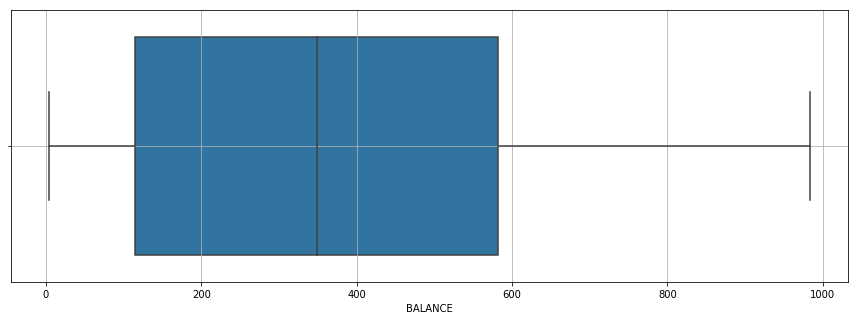

In [144]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

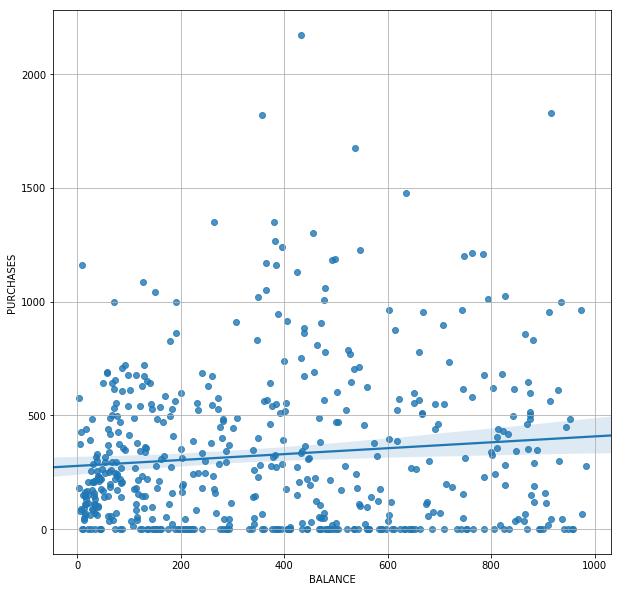

In [145]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

In [146]:
#Cluster 4:

In [147]:
data.iloc[labels_x[4].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,713.0,1292.101857,291.948653,655.786755,1068.434064,1238.140283,1496.580949,2052.325610
BALANCE_FREQUENCY,713.0,0.997195,0.022424,0.727273,1.000000,1.000000,1.000000,1.000000
PURCHASES,713.0,237.701613,321.738957,0.000000,0.000000,100.000000,375.920000,1956.430000
ONEOFF_PURCHASES,713.0,111.364264,224.808077,0.000000,0.000000,0.000000,119.000000,1423.800000
INSTALLMENTS_PURCHASES,713.0,126.916199,216.268625,0.000000,0.000000,0.000000,180.000000,1074.960000
CASH_ADVANCE,713.0,250.250729,379.450297,0.000000,0.000000,79.037888,306.319900,1817.167913
PURCHASES_FREQUENCY,713.0,0.311477,0.362650,0.000000,0.000000,0.083333,0.583333,1.000000
ONEOFF_PURCHASES_FREQUENCY,713.0,0.087424,0.150921,0.000000,0.000000,0.000000,0.083333,0.750000
PURCHASES_INSTALLMENTS_FREQUENCY,713.0,0.238429,0.356674,0.000000,0.000000,0.000000,0.416667,1.000000
CASH_ADVANCE_FREQUENCY,713.0,0.118864,0.126257,0.000000,0.000000,0.083333,0.166667,0.500000


In [148]:
cluster=data.iloc[labels_x[4].index,:]

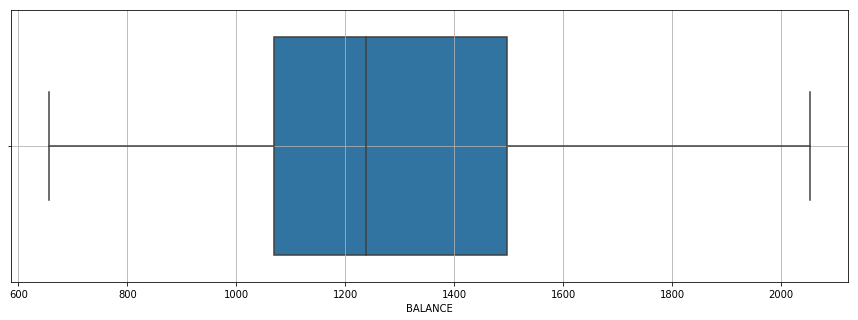

In [149]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

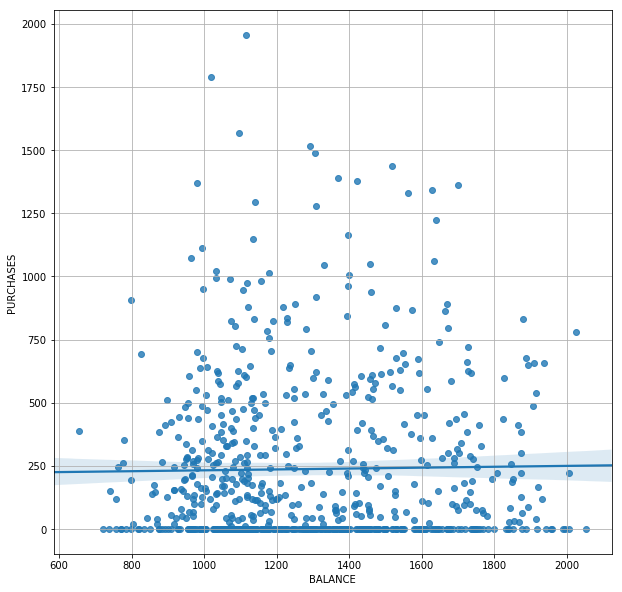

In [150]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

In [151]:
#Cluster 5:

In [152]:
data.iloc[labels_x[5].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,250.0,625.539066,569.158267,2.911999,147.015979,448.798629,1040.253646,2191.369256
BALANCE_FREQUENCY,250.0,0.961818,0.081658,0.727273,1.000000,1.000000,1.000000,1.000000
PURCHASES,250.0,527.260640,456.742034,0.000000,155.775000,422.770000,814.665000,2151.930000
ONEOFF_PURCHASES,250.0,277.673040,362.558915,0.000000,0.000000,102.650000,471.397500,1393.500000
INSTALLMENTS_PURCHASES,250.0,249.587600,271.297726,0.000000,0.000000,164.470000,411.747500,1083.120000
CASH_ADVANCE,250.0,153.056285,344.807050,0.000000,0.000000,0.000000,27.898024,1895.470431
PURCHASES_FREQUENCY,250.0,0.510667,0.350937,0.000000,0.166667,0.500000,0.833333,1.000000
ONEOFF_PURCHASES_FREQUENCY,250.0,0.148000,0.182746,0.000000,0.000000,0.083333,0.250000,0.750000
PURCHASES_INSTALLMENTS_FREQUENCY,250.0,0.400667,0.374424,0.000000,0.000000,0.333333,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,250.0,0.040000,0.086196,0.000000,0.000000,0.000000,0.062500,0.500000


In [153]:
cluster=data.iloc[labels_x[5].index,:]

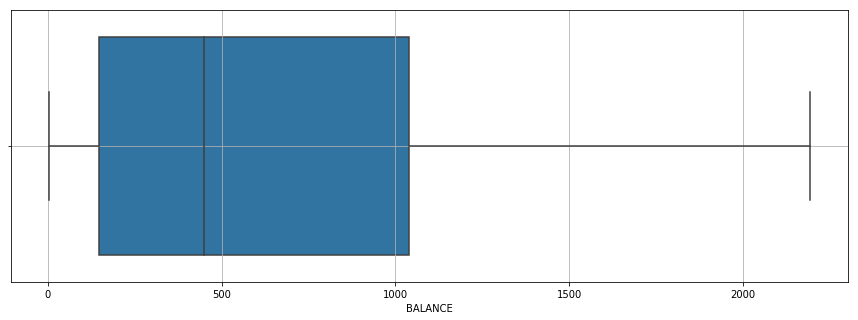

In [154]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

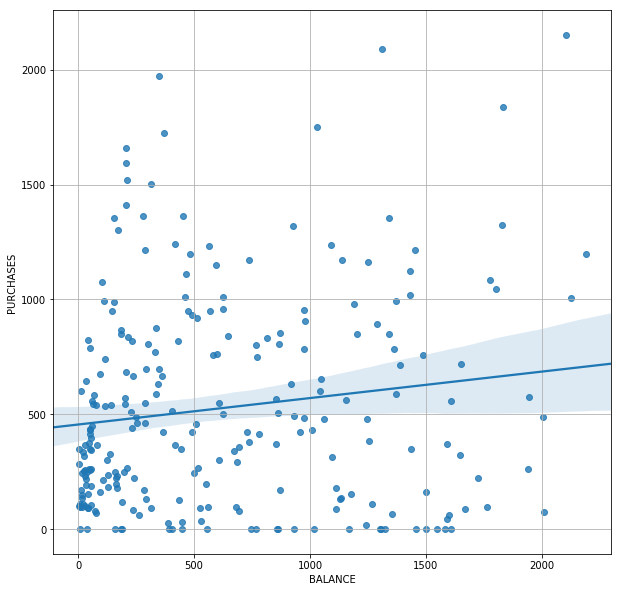

In [155]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

In [156]:
#Cluster 6:

In [157]:
data.iloc[labels_x[6].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,196.0,1093.007598,585.197193,37.427412,652.914572,1054.533447,1435.408659,2886.330537
BALANCE_FREQUENCY,196.0,0.956865,0.074476,0.727273,0.909091,1.000000,1.000000,1.000000
PURCHASES,196.0,392.950510,511.623633,0.000000,0.000000,122.830000,667.330000,2315.860000
ONEOFF_PURCHASES,196.0,240.851939,390.081682,0.000000,0.000000,0.000000,327.032500,1401.150000
INSTALLMENTS_PURCHASES,196.0,152.098571,258.971469,0.000000,0.000000,0.000000,223.790000,1093.510000
CASH_ADVANCE,196.0,1279.402150,791.298374,0.000000,735.930819,1344.014380,1899.578312,2773.394382
PURCHASES_FREQUENCY,196.0,0.297194,0.344996,0.000000,0.000000,0.166667,0.500000,1.000000
ONEOFF_PURCHASES_FREQUENCY,196.0,0.122874,0.181682,0.000000,0.000000,0.000000,0.250000,0.666667
PURCHASES_INSTALLMENTS_FREQUENCY,196.0,0.203656,0.323156,0.000000,0.000000,0.000000,0.333333,1.000000
CASH_ADVANCE_FREQUENCY,196.0,0.198554,0.132946,0.000000,0.083333,0.166667,0.333333,0.500000


In [158]:
cluster=data.iloc[labels_x[6].index,:]

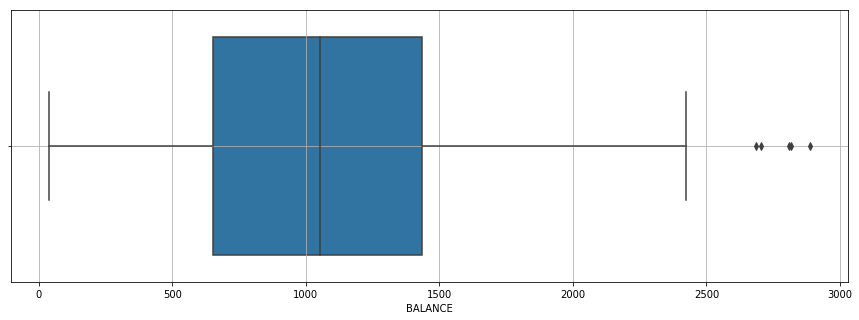

In [159]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

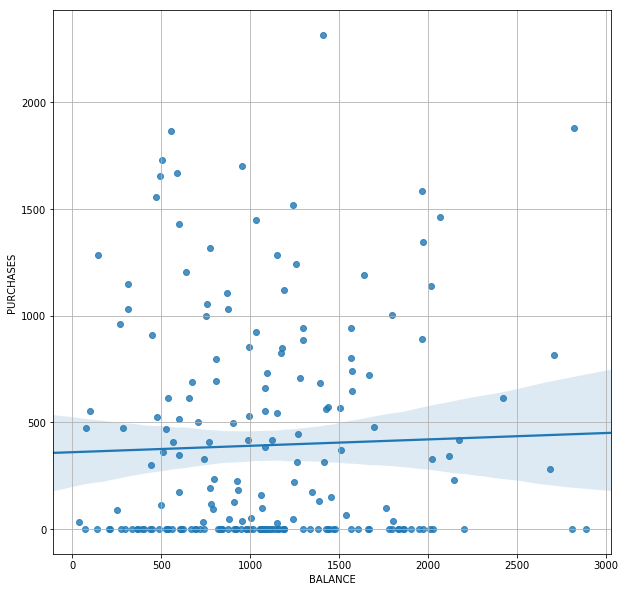

In [160]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

In [161]:
#Cluster 7:

In [162]:
data.iloc[labels_x[7].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,88.0,1258.062920,1295.320288,5.871769,250.155454,711.843159,1824.019807,4719.819043
BALANCE_FREQUENCY,88.0,0.965909,0.079555,0.727273,1.000000,1.000000,1.000000,1.000000
PURCHASES,88.0,616.799205,557.805138,0.000000,111.800000,510.165000,1006.940000,2143.730000
ONEOFF_PURCHASES,88.0,383.902159,432.308732,0.000000,0.000000,201.040000,643.307500,1392.830000
INSTALLMENTS_PURCHASES,88.0,232.897045,297.950519,0.000000,0.000000,97.600000,429.145000,1104.790000
CASH_ADVANCE,88.0,335.284903,673.624665,0.000000,0.000000,0.000000,270.692205,2583.510846
PURCHASES_FREQUENCY,88.0,0.456439,0.346018,0.000000,0.083333,0.500000,0.770833,1.000000
ONEOFF_PURCHASES_FREQUENCY,88.0,0.178977,0.184202,0.000000,0.000000,0.083333,0.333333,0.750000
PURCHASES_INSTALLMENTS_FREQUENCY,88.0,0.344697,0.355171,0.000000,0.000000,0.291666,0.604166,1.000000
CASH_ADVANCE_FREQUENCY,88.0,0.064394,0.117666,0.000000,0.000000,0.000000,0.083333,0.500000


In [163]:
cluster=data.iloc[labels_x[7].index,:]

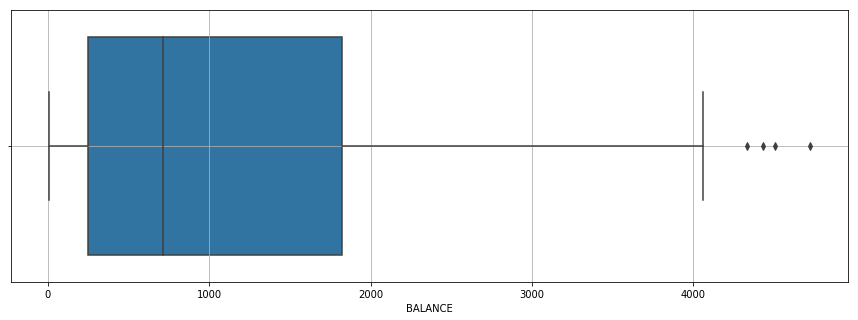

In [164]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

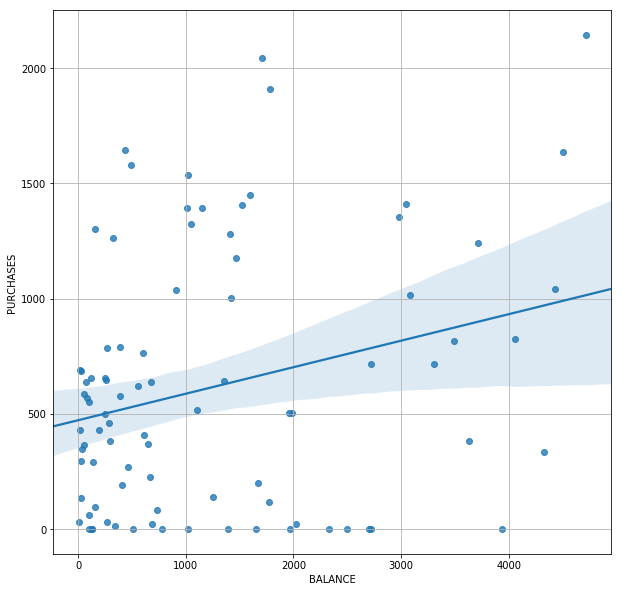

In [165]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

In [166]:
#Cluster 8:

In [167]:
data.iloc[labels_x[8].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,162.0,3298.349265,802.420592,1386.020611,2683.793528,3297.557684,3944.581883,4931.203112
BALANCE_FREQUENCY,162.0,0.999439,0.007142,0.909091,1.000000,1.000000,1.000000,1.000000
PURCHASES,162.0,313.278457,452.672789,0.000000,0.000000,73.410000,468.457500,2197.210000
ONEOFF_PURCHASES,162.0,188.247037,320.798558,0.000000,0.000000,0.000000,271.495000,1443.330000
INSTALLMENTS_PURCHASES,162.0,125.031420,249.106602,0.000000,0.000000,0.000000,130.390000,1095.450000
CASH_ADVANCE,162.0,1234.866088,854.626518,0.000000,476.937012,1188.773049,1956.338253,2780.106659
PURCHASES_FREQUENCY,162.0,0.272634,0.330738,0.000000,0.000000,0.083333,0.562500,1.000000
ONEOFF_PURCHASES_FREQUENCY,162.0,0.108025,0.177662,0.000000,0.000000,0.000000,0.166667,0.750000
PURCHASES_INSTALLMENTS_FREQUENCY,162.0,0.180041,0.298650,0.000000,0.000000,0.000000,0.250000,1.000000
CASH_ADVANCE_FREQUENCY,162.0,0.207305,0.144259,0.000000,0.083333,0.166667,0.333333,0.500000


In [168]:
cluster=data.iloc[labels_x[8].index,:]

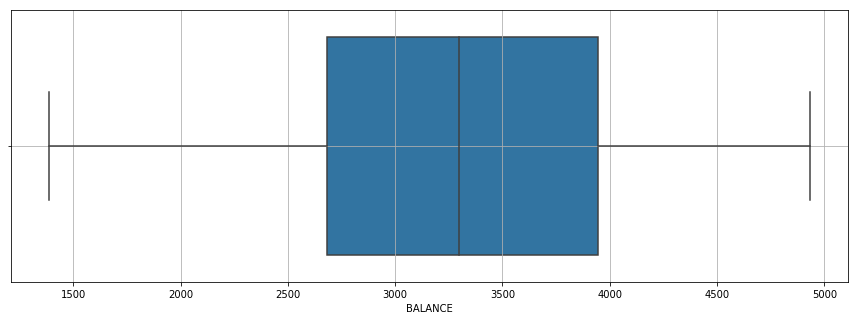

In [169]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

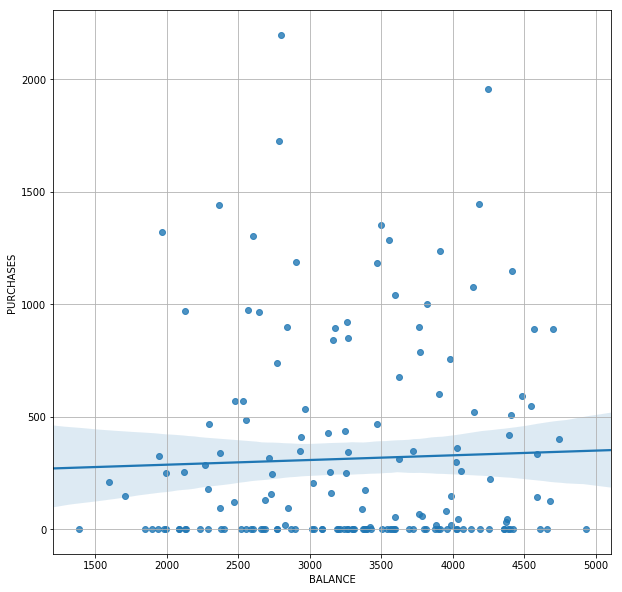

In [170]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

In [171]:
#Cluster 9:

In [172]:
data.iloc[labels_x[9].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,234.0,682.875291,634.936790,1.198223,124.306106,476.233482,1144.945328,2450.031338
BALANCE_FREQUENCY,234.0,0.961927,0.081867,0.727273,1.000000,1.000000,1.000000,1.000000
PURCHASES,234.0,574.210470,537.705001,0.000000,107.952500,420.015000,902.997500,2238.000000
ONEOFF_PURCHASES,234.0,338.956325,394.132838,0.000000,0.000000,177.500000,585.940000,1424.870000
INSTALLMENTS_PURCHASES,234.0,236.471880,300.818396,0.000000,0.000000,100.000000,405.295000,1152.830000
CASH_ADVANCE,234.0,176.760291,419.267666,0.000000,0.000000,0.000000,85.525774,2234.780695
PURCHASES_FREQUENCY,234.0,0.462251,0.351693,0.000000,0.104167,0.416667,0.750000,1.000000
ONEOFF_PURCHASES_FREQUENCY,234.0,0.183048,0.199916,0.000000,0.000000,0.083333,0.250000,0.750000
PURCHASES_INSTALLMENTS_FREQUENCY,234.0,0.325142,0.367878,0.000000,0.000000,0.166667,0.645834,1.000000
CASH_ADVANCE_FREQUENCY,234.0,0.041667,0.085015,0.000000,0.000000,0.000000,0.083333,0.500000


In [173]:
cluster=data.iloc[labels_x[9].index,:]

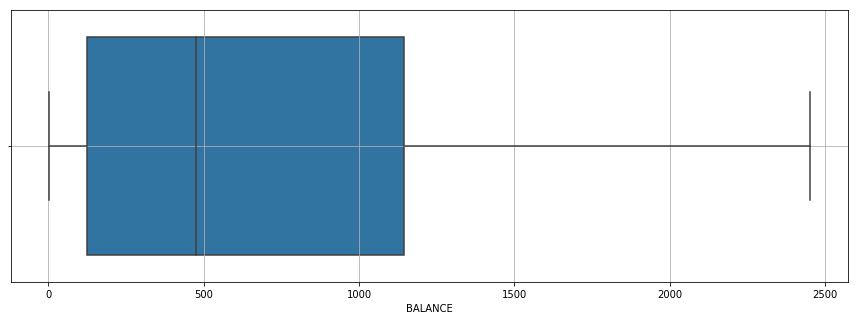

In [174]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

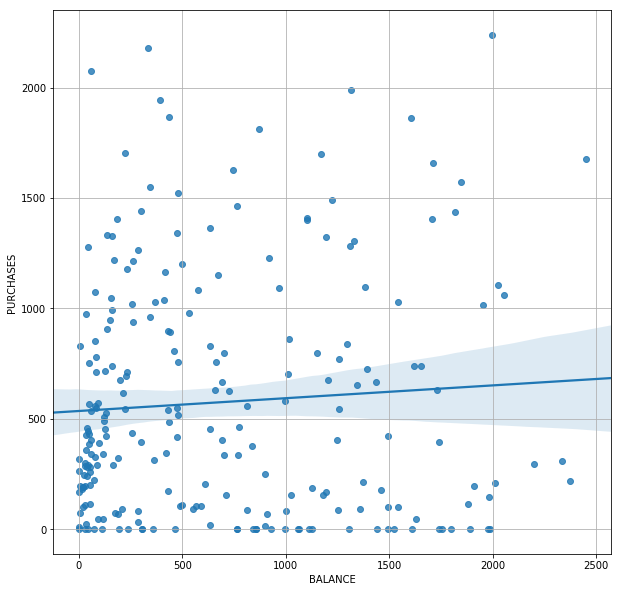

In [175]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()